In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
import scipy.special
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\ronak\OneDrive\Desktop\project 1\Customers2.csv")
df

CustomerID  NumCalls  NumEmails  NumDownloads  NumEvents  NumForms  \
0             1         9          2             1          1         1   
1             2         9          2             1          1         1   
2             3         9          2             1          1         1   
3             4         0          2             0          0         0   
4             5        15          0             0          0         0   
..          ...       ...        ...           ...        ...       ...   
748         749         1          0             0          0         0   
749         750         0          0             0          0         1   
750         751        10          0             0          0         0   
751         752         9          1             0          0         0   
752         753        27          0             0          0         0   

    Language    Country  WebVisits  PageVisits PriorClient MadeAPurchase  \
0    Spanish  Argentina        0.0         1.0         Yes           Yes   
1    Spanish  Argentina        1.0         0.0         Yes           Yes   
2    Spanish  Argentina        1.0         0.0         Yes            No   
3     German    Austria        4.0         0.0         Yes           Yes   
4     German    Austria       11.0         4.0          No            No   
..       ...        ...        ...         ...         ...           ...   
748  English        USA        1.0         0.0         Yes           Yes   
749  English        USA        0.0         0.0         Yes           Yes   
750  English        USA        0.0         0.0          No           Yes   
751  English        USA        0.0         1.0          No           Yes   
752  English        USA        0.0         0.0          No           Yes   

         Continent  
0    North America  
1    North America  
2    North America  
3           Europe  
4           Europe  
..             ...  
748  North America  
749  North America  
750  North America  
751  North America  
752  North America  

[753 rows x 13 columns]

In [3]:
df.head()

CustomerID  NumCalls  NumEmails  NumDownloads  NumEvents  NumForms  \
0           1         9          2             1          1         1   
1           2         9          2             1          1         1   
2           3         9          2             1          1         1   
3           4         0          2             0          0         0   
4           5        15          0             0          0         0   

  Language    Country  WebVisits  PageVisits PriorClient MadeAPurchase  \
0  Spanish  Argentina        0.0         1.0         Yes           Yes   
1  Spanish  Argentina        1.0         0.0         Yes           Yes   
2  Spanish  Argentina        1.0         0.0         Yes            No   
3   German    Austria        4.0         0.0         Yes           Yes   
4   German    Austria       11.0         4.0          No            No   

       Continent  
0  North America  
1  North America  
2  North America  
3         Europe  
4         Europe

In [4]:
df.tail()

CustomerID  NumCalls  NumEmails  NumDownloads  NumEvents  NumForms  \
748         749         1          0             0          0         0   
749         750         0          0             0          0         1   
750         751        10          0             0          0         0   
751         752         9          1             0          0         0   
752         753        27          0             0          0         0   

    Language Country  WebVisits  PageVisits PriorClient MadeAPurchase  \
748  English     USA        1.0         0.0         Yes           Yes   
749  English     USA        0.0         0.0         Yes           Yes   
750  English     USA        0.0         0.0          No           Yes   
751  English     USA        0.0         1.0          No           Yes   
752  English     USA        0.0         0.0          No           Yes   

         Continent  
748  North America  
749  North America  
750  North America  
751  North America  
752  North America

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 13 columns):
CustomerID       753 non-null int64
NumCalls         753 non-null int64
NumEmails        753 non-null int64
NumDownloads     753 non-null int64
NumEvents        753 non-null int64
NumForms         753 non-null int64
Language         753 non-null object
Country          753 non-null object
WebVisits        739 non-null float64
PageVisits       739 non-null float64
PriorClient      753 non-null object
MadeAPurchase    753 non-null object
Continent        753 non-null object
dtypes: float64(2), int64(6), object(5)
memory usage: 76.6+ KB


In [6]:
df.shape

(753, 13)

In [7]:
df1=df.drop(['CustomerID','Continent'],axis=1)

In [8]:
df1

NumCalls  NumEmails  NumDownloads  NumEvents  NumForms Language  \
0           9          2             1          1         1  Spanish   
1           9          2             1          1         1  Spanish   
2           9          2             1          1         1  Spanish   
3           0          2             0          0         0   German   
4          15          0             0          0         0   German   
..        ...        ...           ...        ...       ...      ...   
748         1          0             0          0         0  English   
749         0          0             0          0         1  English   
750        10          0             0          0         0  English   
751         9          1             0          0         0  English   
752        27          0             0          0         0  English   

       Country  WebVisits  PageVisits PriorClient MadeAPurchase  
0    Argentina        0.0         1.0         Yes           Yes  
1    Argentina        1.0         0.0         Yes           Yes  
2    Argentina        1.0         0.0         Yes            No  
3      Austria        4.0         0.0         Yes           Yes  
4      Austria       11.0         4.0          No            No  
..         ...        ...         ...         ...           ...  
748        USA        1.0         0.0         Yes           Yes  
749        USA        0.0         0.0         Yes           Yes  
750        USA        0.0         0.0          No           Yes  
751        USA        0.0         1.0          No           Yes  
752        USA        0.0         0.0          No           Yes  

[753 rows x 11 columns]

In [9]:
df1.describe()

NumCalls   NumEmails  NumDownloads   NumEvents    NumForms  \
count  753.000000  753.000000    753.000000  753.000000  753.000000   
mean     5.946879    1.284197      0.358566    0.339973    0.265604   
std      8.759028    3.767721      0.929129    0.838697    1.229556   
min      0.000000    0.000000      0.000000    0.000000    0.000000   
25%      0.000000    0.000000      0.000000    0.000000    0.000000   
50%      1.000000    0.000000      0.000000    0.000000    0.000000   
75%     10.000000    1.000000      0.000000    0.000000    0.000000   
max     55.000000   41.000000     11.000000    6.000000   14.000000   

        WebVisits  PageVisits  
count  739.000000  739.000000  
mean     4.209743    3.645467  
std     10.613721   12.600658  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      3.500000    1.000000  
max    133.000000  117.000000

In [10]:
df1.isnull()

NumCalls  NumEmails  NumDownloads  NumEvents  NumForms  Language  \
0       False      False         False      False     False     False   
1       False      False         False      False     False     False   
2       False      False         False      False     False     False   
3       False      False         False      False     False     False   
4       False      False         False      False     False     False   
..        ...        ...           ...        ...       ...       ...   
748     False      False         False      False     False     False   
749     False      False         False      False     False     False   
750     False      False         False      False     False     False   
751     False      False         False      False     False     False   
752     False      False         False      False     False     False   

     Country  WebVisits  PageVisits  PriorClient  MadeAPurchase  
0      False      False       False        False          False  
1      False      False       False        False          False  
2      False      False       False        False          False  
3      False      False       False        False          False  
4      False      False       False        False          False  
..       ...        ...         ...          ...            ...  
748    False      False       False        False          False  
749    False      False       False        False          False  
750    False      False       False        False          False  
751    False      False       False        False          False  
752    False      False       False        False          False  

[753 rows x 11 columns]

# 1 Histogram for number of calls

C:\Users\ronak\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ronak\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


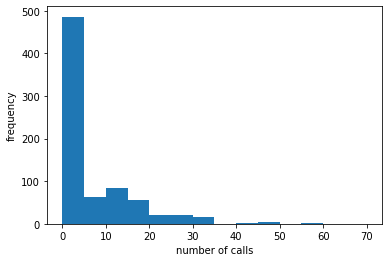

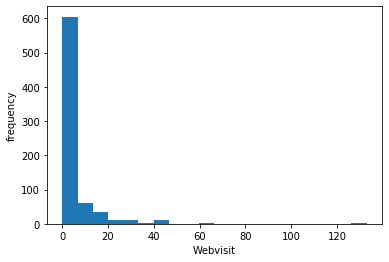

In [11]:
plt.figure(1)
plt.subplot(111)
bin_edges=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70]
plt.hist(df1['NumCalls'],bins= bin_edges)
plt.xlabel('number of calls')
plt.ylabel('frequency')


plt.figure(2)
plt.hist(df1['WebVisits'],bins=20)
plt.xlabel('Webvisit')
plt.ylabel('frequency')
plt.show()

# 2 Percentage of specific country in the column


In [12]:
s=df1.Country
counts=s.value_counts()
counts

USA            180
Canada         151
Japan           72
France          43
China           39
Mexico          36
Spain           27
Colombia        27
India           24
Switzerland     24
Brazil          24
Singapore       18
Italy           18
Germany         10
Finland          9
Belgium          6
Austria          6
Chile            6
Netherlands      6
Thailand         3
Denmark          3
Peru             3
Portugal         3
Hungary          3
Uganda           3
Norway           3
Serbia           3
Argentina        3
Name: Country, dtype: int64

In [13]:
percent=s.value_counts(normalize=True)
percent100= s.value_counts(normalize=True).mul(100).round(1).astype(str)+ '%'
percent100

USA            23.9%
Canada         20.1%
Japan           9.6%
France          5.7%
China           5.2%
Mexico          4.8%
Spain           3.6%
Colombia        3.6%
India           3.2%
Switzerland     3.2%
Brazil          3.2%
Singapore       2.4%
Italy           2.4%
Germany         1.3%
Finland         1.2%
Belgium         0.8%
Austria         0.8%
Chile           0.8%
Netherlands     0.8%
Thailand        0.4%
Denmark         0.4%
Peru            0.4%
Portugal        0.4%
Hungary         0.4%
Uganda          0.4%
Norway          0.4%
Serbia          0.4%
Argentina       0.4%
Name: Country, dtype: object

In [14]:
my_dict={'Country': ['USA','Canada','Japan','France','China','Maxico','Colombia','Spain','Brazil','Switzerland','India',
   'Italy','Singapore','Germany','Finland','Belgium','Chile','Austria','Netherlands','Portugal','Argentina','Serbia','Thiland',
                     'Peru','Denmark','Uganda','Norway','Hungry'],
        'total_percent':[23.9,20.1,9.6,5.7,5.2,4.8,3.6,3.6,3.2,3.2,3.2,2.4,2.4,1.3,1.2,0.8,
                       0.8, 0.8, 0.8,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4]}
df=pd.DataFrame(my_dict)
df

Country  total_percent
0           USA           23.9
1        Canada           20.1
2         Japan            9.6
3        France            5.7
4         China            5.2
5        Maxico            4.8
6      Colombia            3.6
7         Spain            3.6
8        Brazil            3.2
9   Switzerland            3.2
10        India            3.2
11        Italy            2.4
12    Singapore            2.4
13      Germany            1.3
14      Finland            1.2
15      Belgium            0.8
16        Chile            0.8
17      Austria            0.8
18  Netherlands            0.8
19     Portugal            0.4
20    Argentina            0.4
21       Serbia            0.4
22      Thiland            0.4
23         Peru            0.4
24      Denmark            0.4
25       Uganda            0.4
26       Norway            0.4
27       Hungry            0.4

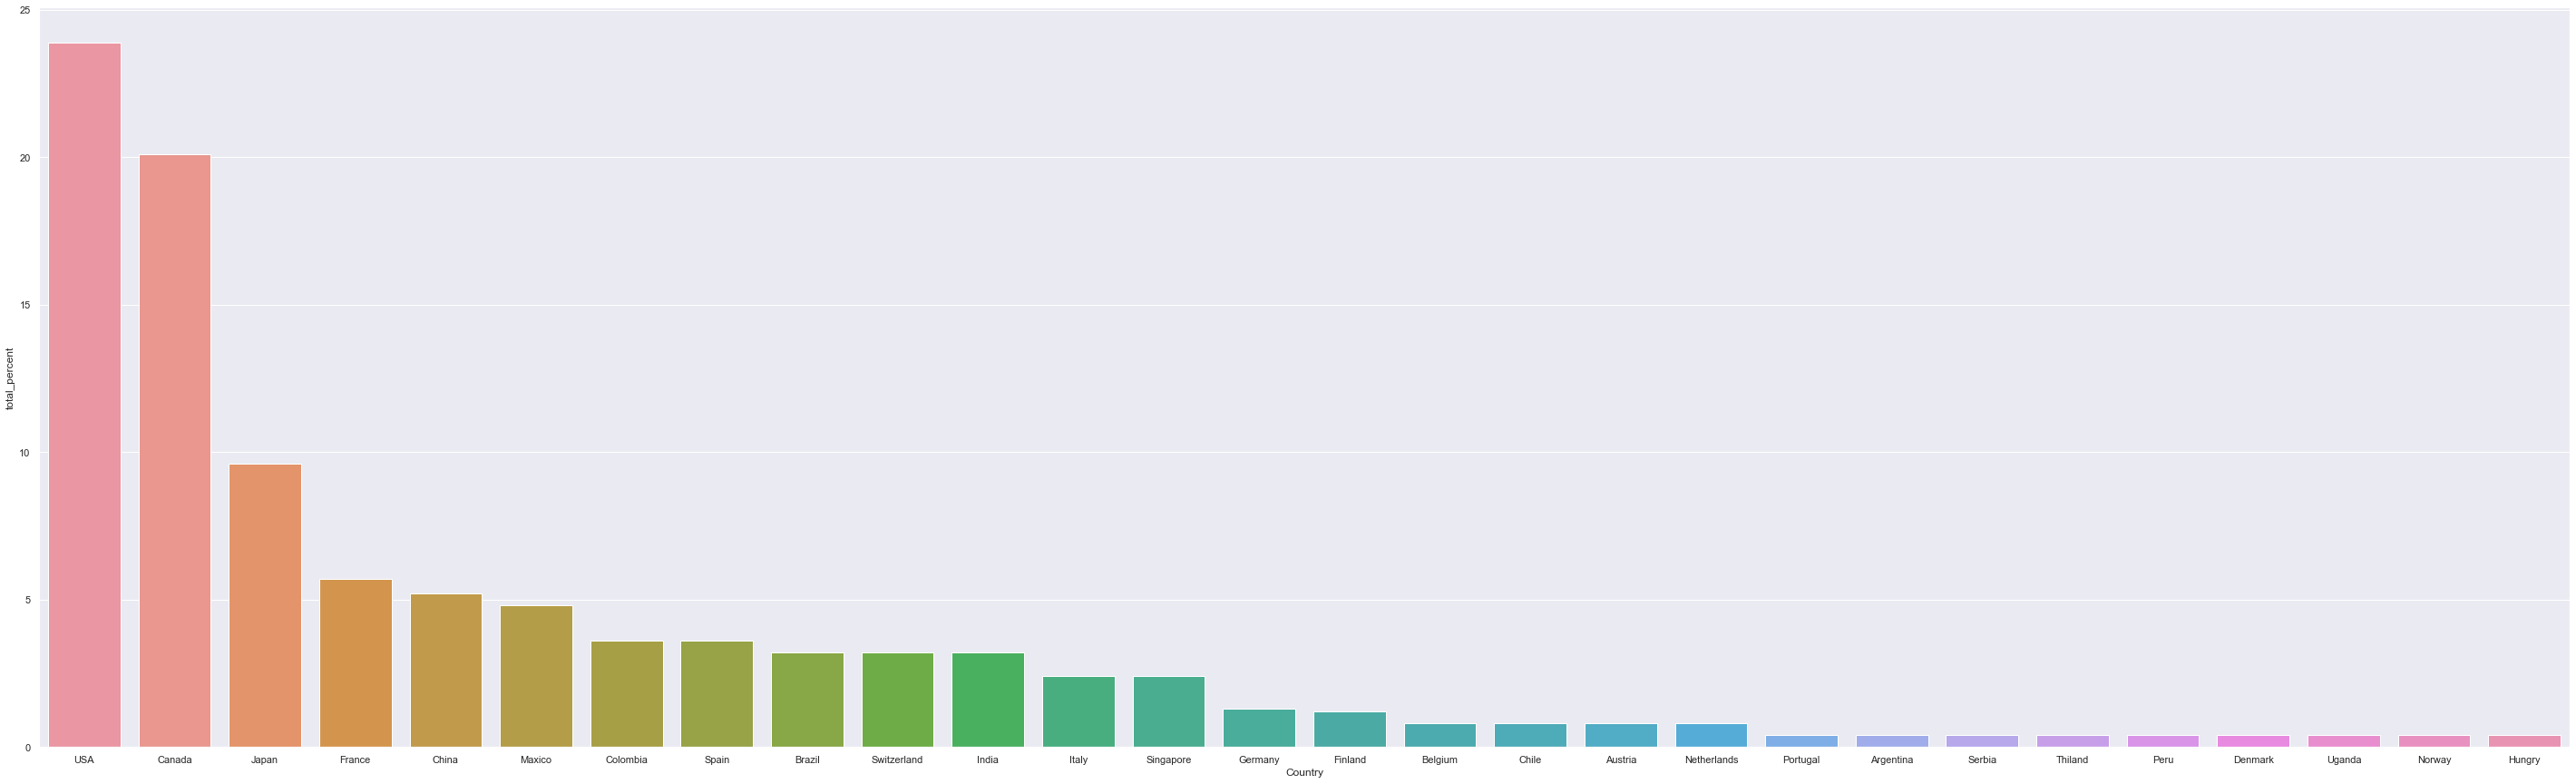

In [15]:
sns.set(rc={'figure.figsize':(50,15)})
sns.barplot(x="Country",y="total_percent",data=df)
plt.show()

# 3 TotalInteraction= sum of Numcalls,NumEmails,NumDownloads,NumEvents,NumForms

In [16]:
df1['Totalinteraction']=df1['NumCalls']+df1['NumEmails']+df1['NumDownloads']+df1['NumEvents']+df1['NumForms']
print(df1)

     NumCalls  NumEmails  NumDownloads  NumEvents  NumForms Language  \
0           9          2             1          1         1  Spanish   
1           9          2             1          1         1  Spanish   
2           9          2             1          1         1  Spanish   
3           0          2             0          0         0   German   
4          15          0             0          0         0   German   
..        ...        ...           ...        ...       ...      ...   
748         1          0             0          0         0  English   
749         0          0             0          0         1  English   
750        10          0             0          0         0  English   
751         9          1             0          0         0  English   
752        27          0             0          0         0  English   

       Country  WebVisits  PageVisits PriorClient MadeAPurchase  \
0    Argentina        0.0         1.0         Yes           Yes   
1

In [17]:
df1.sort_values(by='Country', ascending=True)

NumCalls  NumEmails  NumDownloads  NumEvents  NumForms Language  \
0           9          2             1          1         1  Spanish   
1           9          2             1          1         1  Spanish   
2           9          2             1          1         1  Spanish   
3           0          2             0          0         0   German   
4          15          0             0          0         0   German   
..        ...        ...           ...        ...       ...      ...   
627        10          0             0          0         0  English   
752        27          0             0          0         0  English   
572         6          0             0          0         0  English   
571         6          0             0          0         0  English   
570         6          0             0          0         0  English   

       Country  WebVisits  PageVisits PriorClient MadeAPurchase  \
0    Argentina        0.0         1.0         Yes           Yes   
1    Argentina        1.0         0.0         Yes           Yes   
2    Argentina        1.0         0.0         Yes            No   
3      Austria        4.0         0.0         Yes           Yes   
4      Austria       11.0         4.0          No            No   
..         ...        ...         ...         ...           ...   
627        USA        0.0        10.0         Yes           Yes   
752        USA        0.0         0.0          No           Yes   
572     Uganda        1.0         0.0         Yes            No   
571     Uganda        1.0         0.0         Yes            No   
570     Uganda        0.0         0.0         Yes           Yes   

     Totalinteraction  
0                  14  
1                  14  
2                  14  
3                   2  
4                  15  
..                ...  
627                10  
752                27  
572                 6  
571                 6  
570                 6  

[753 rows x 12 columns]

#  Classification model Process

C:\Users\ronak\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ronak\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


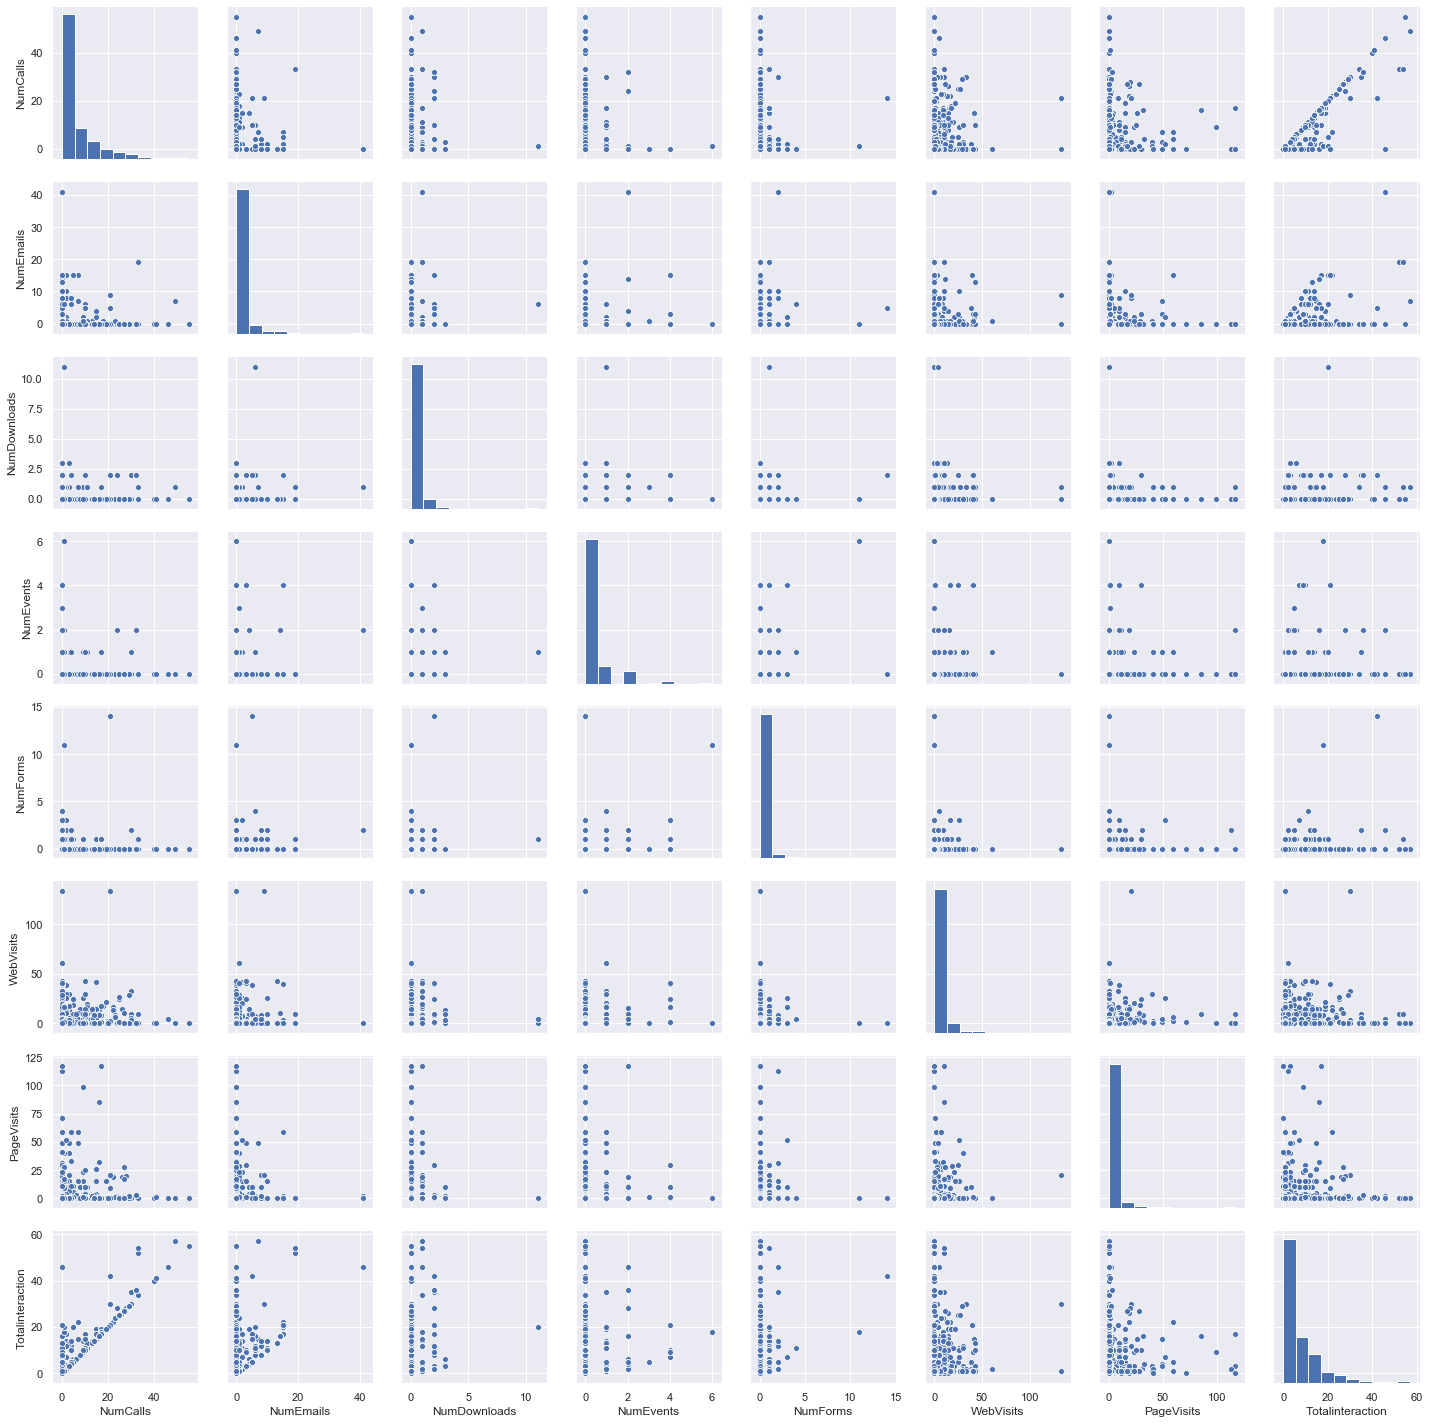

In [18]:
sns.pairplot(df1)

In [19]:
PriorClient= {'Yes':1, 'No':0}
df1.PriorClient = [ PriorClient[item] for item in df1.PriorClient]
MadeAPurchase= {'Yes' : 1, 'No':0}
df1.MadeAPurchase = [MadeAPurchase[item] for item in df1.MadeAPurchase]
print(df1)


     NumCalls  NumEmails  NumDownloads  NumEvents  NumForms Language  \
0           9          2             1          1         1  Spanish   
1           9          2             1          1         1  Spanish   
2           9          2             1          1         1  Spanish   
3           0          2             0          0         0   German   
4          15          0             0          0         0   German   
..        ...        ...           ...        ...       ...      ...   
748         1          0             0          0         0  English   
749         0          0             0          0         1  English   
750        10          0             0          0         0  English   
751         9          1             0          0         0  English   
752        27          0             0          0         0  English   

       Country  WebVisits  PageVisits  PriorClient  MadeAPurchase  \
0    Argentina        0.0         1.0            1              1 

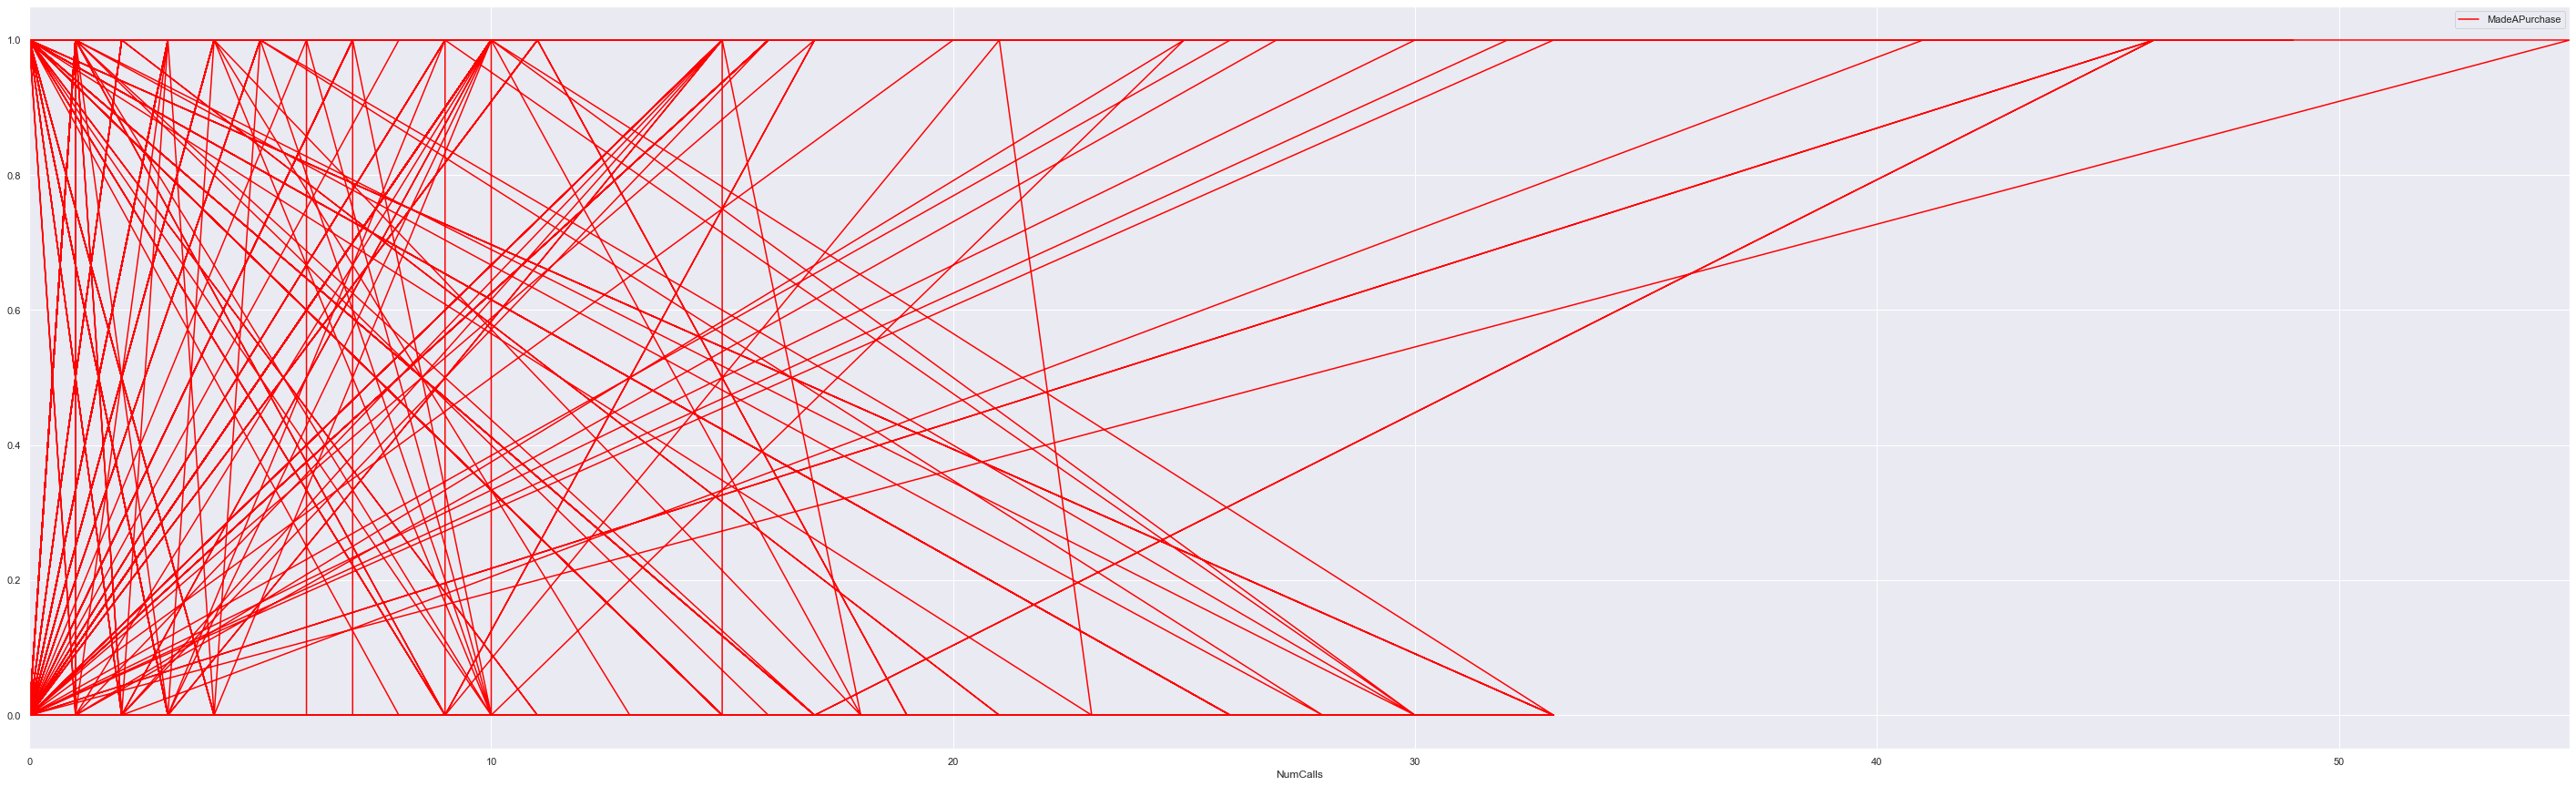

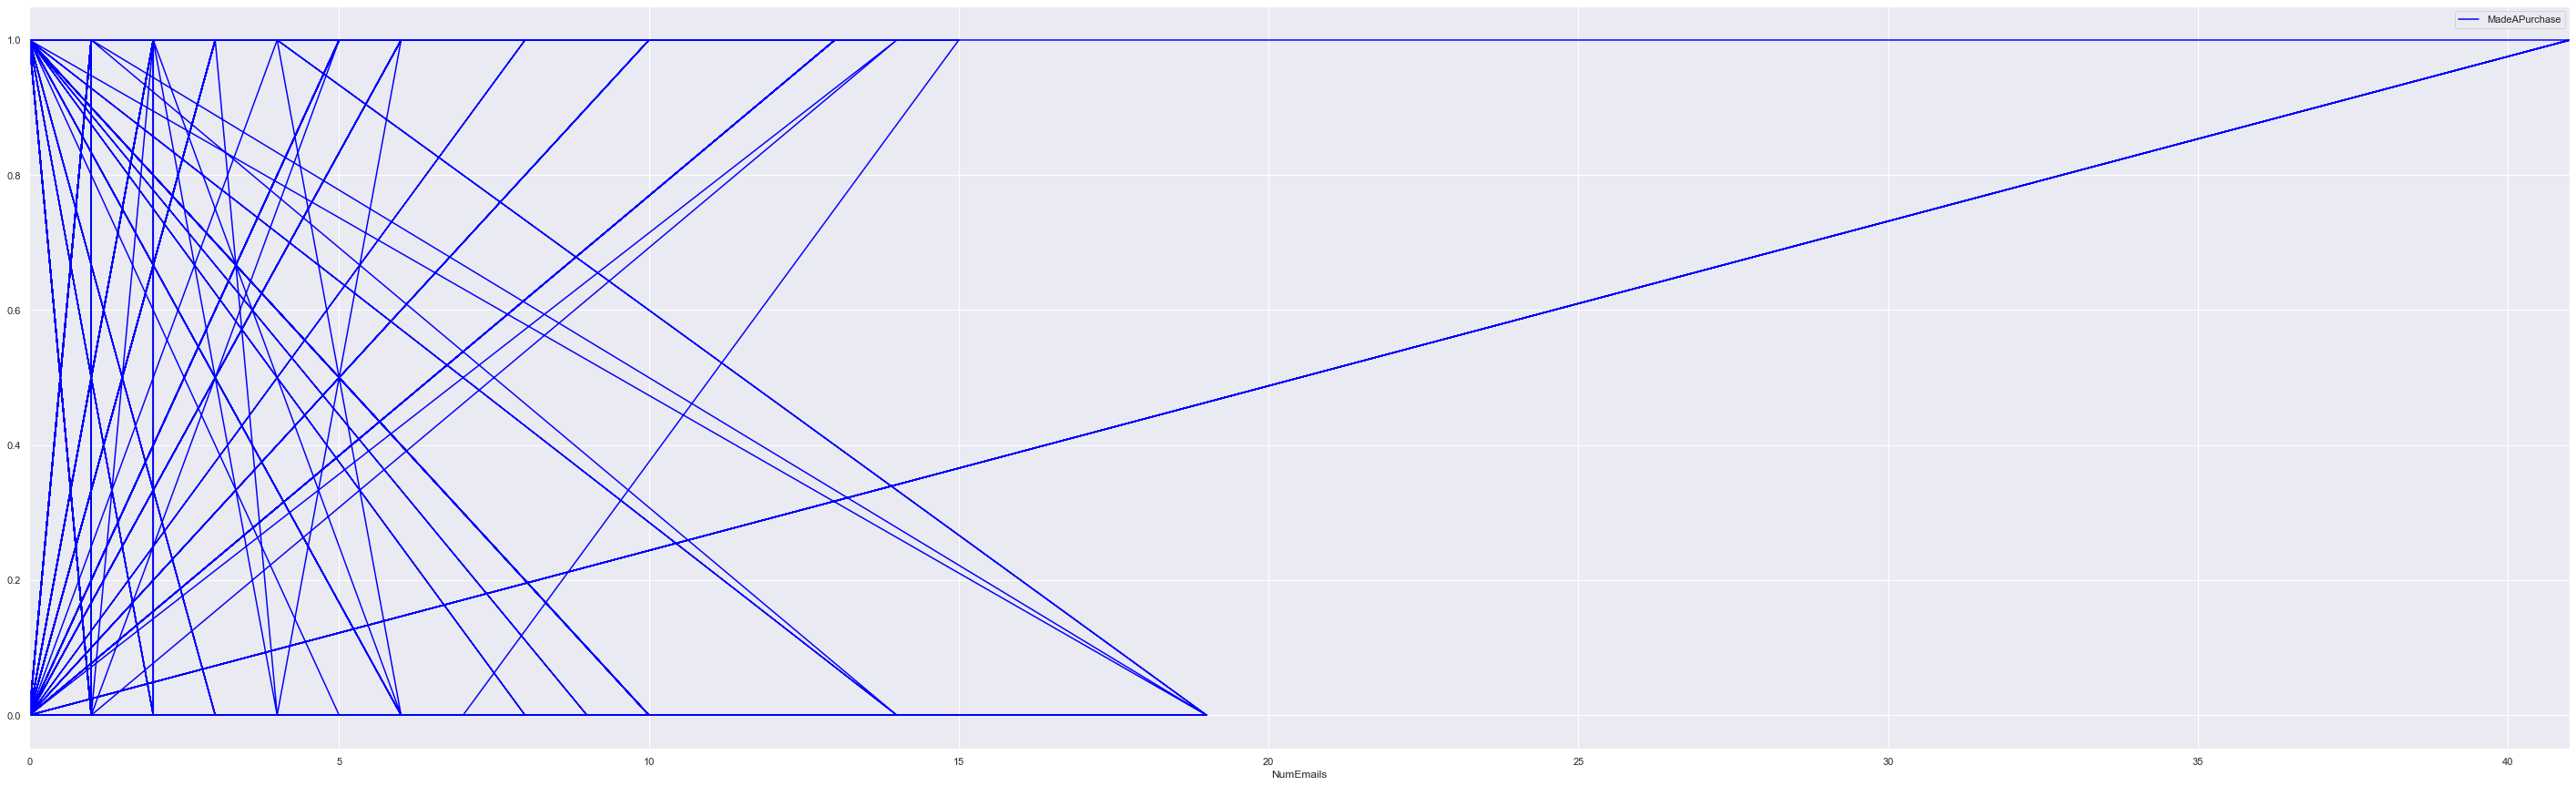

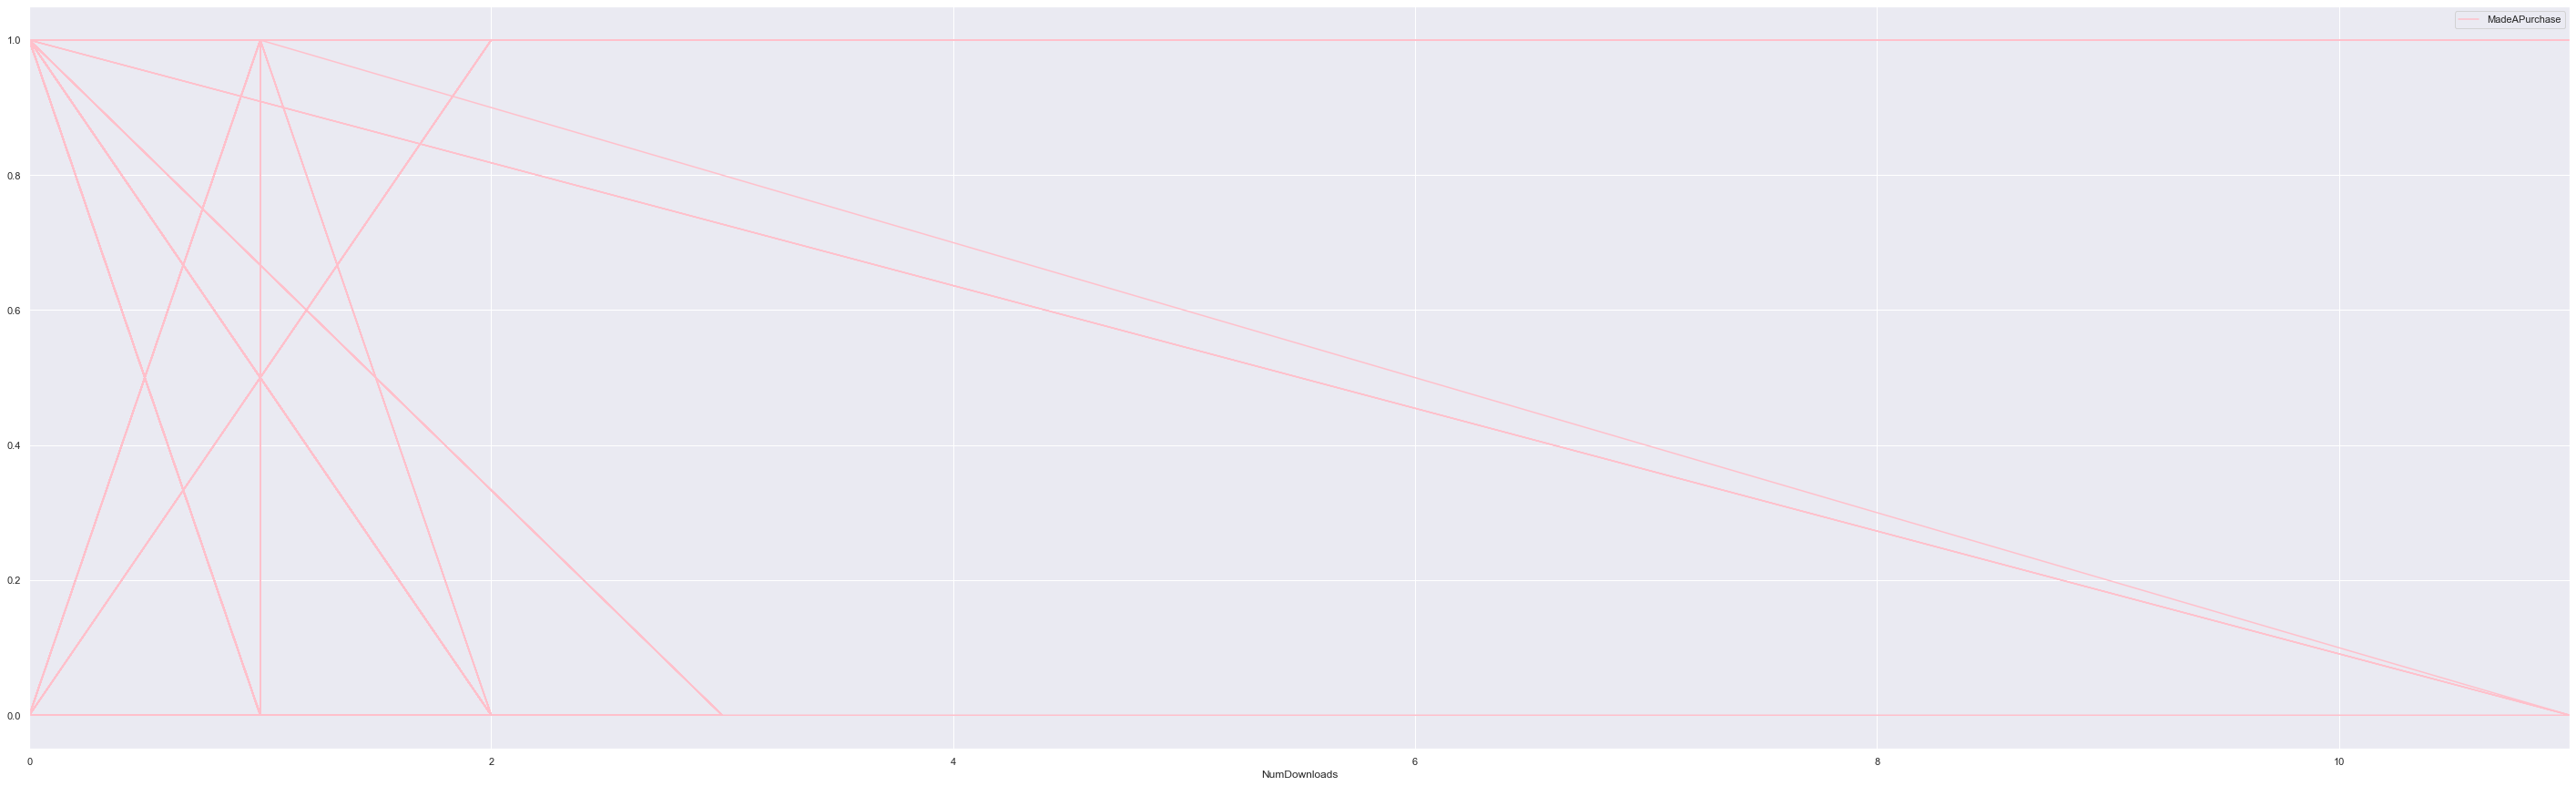

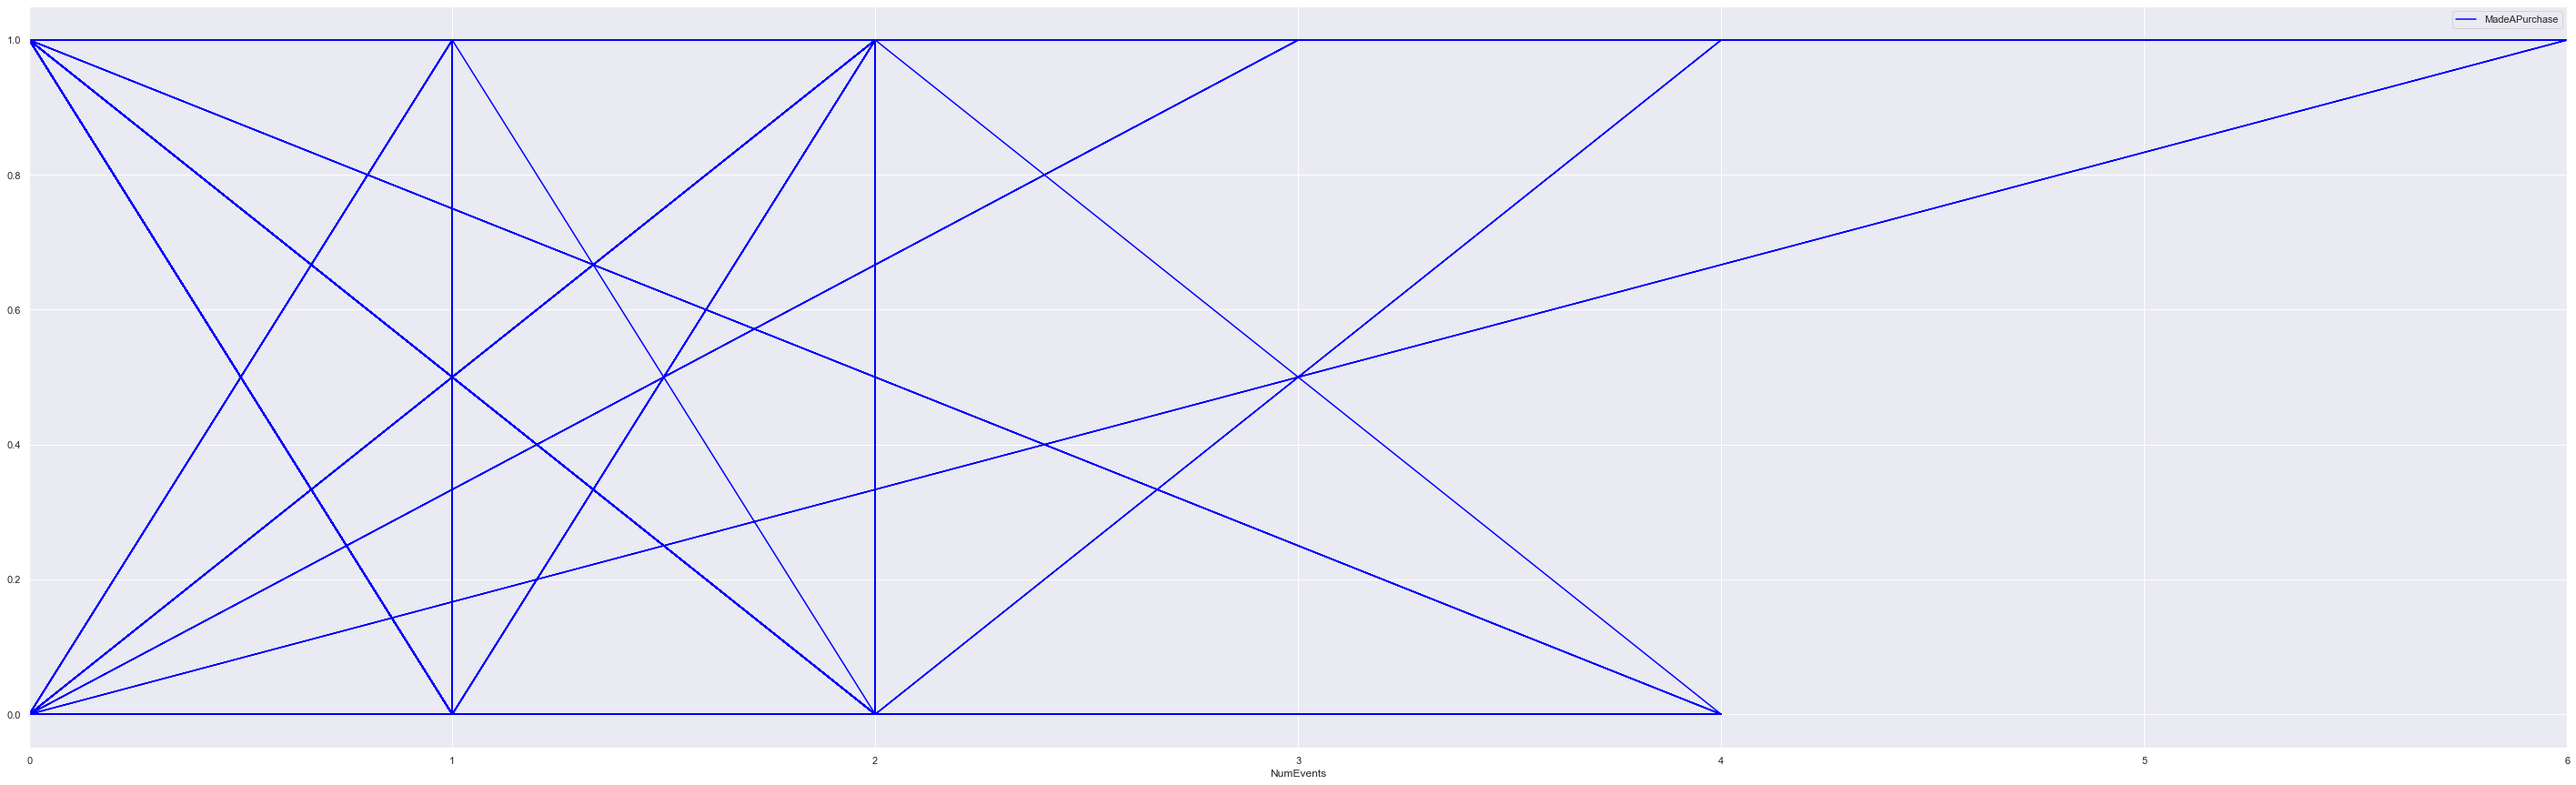

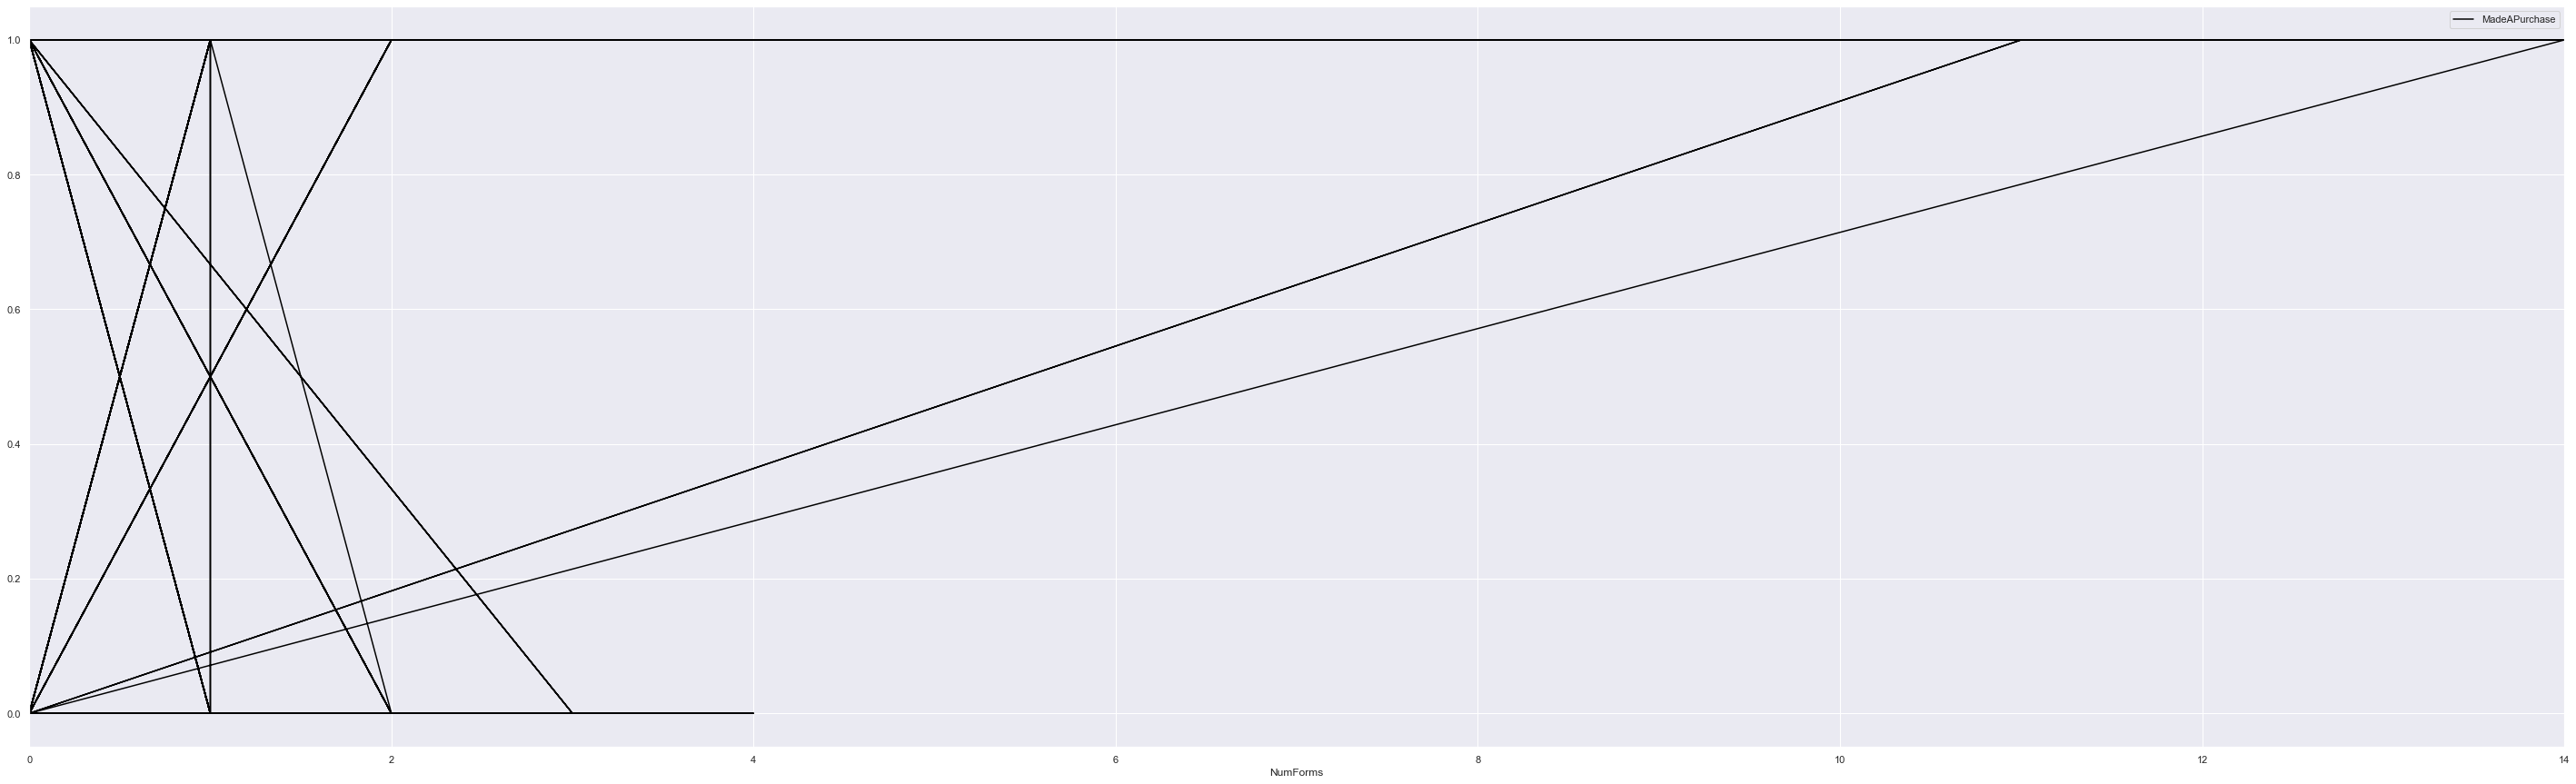

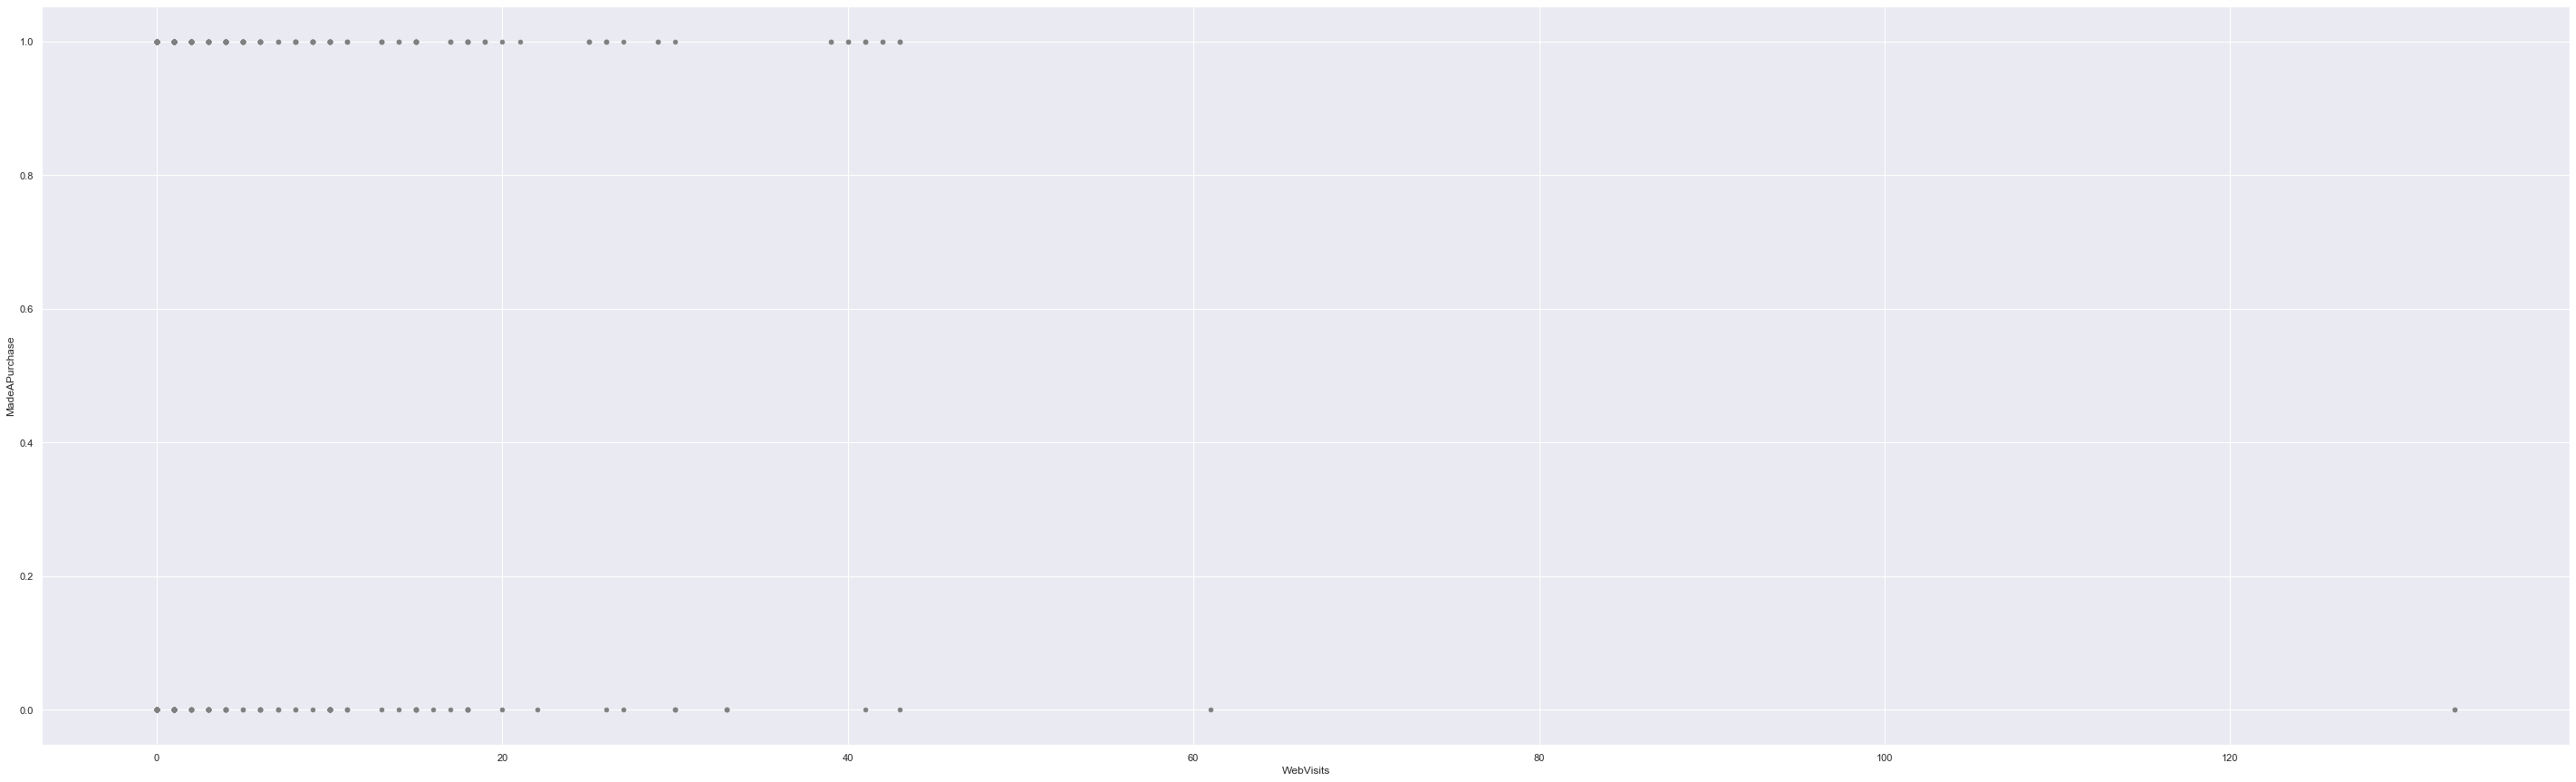

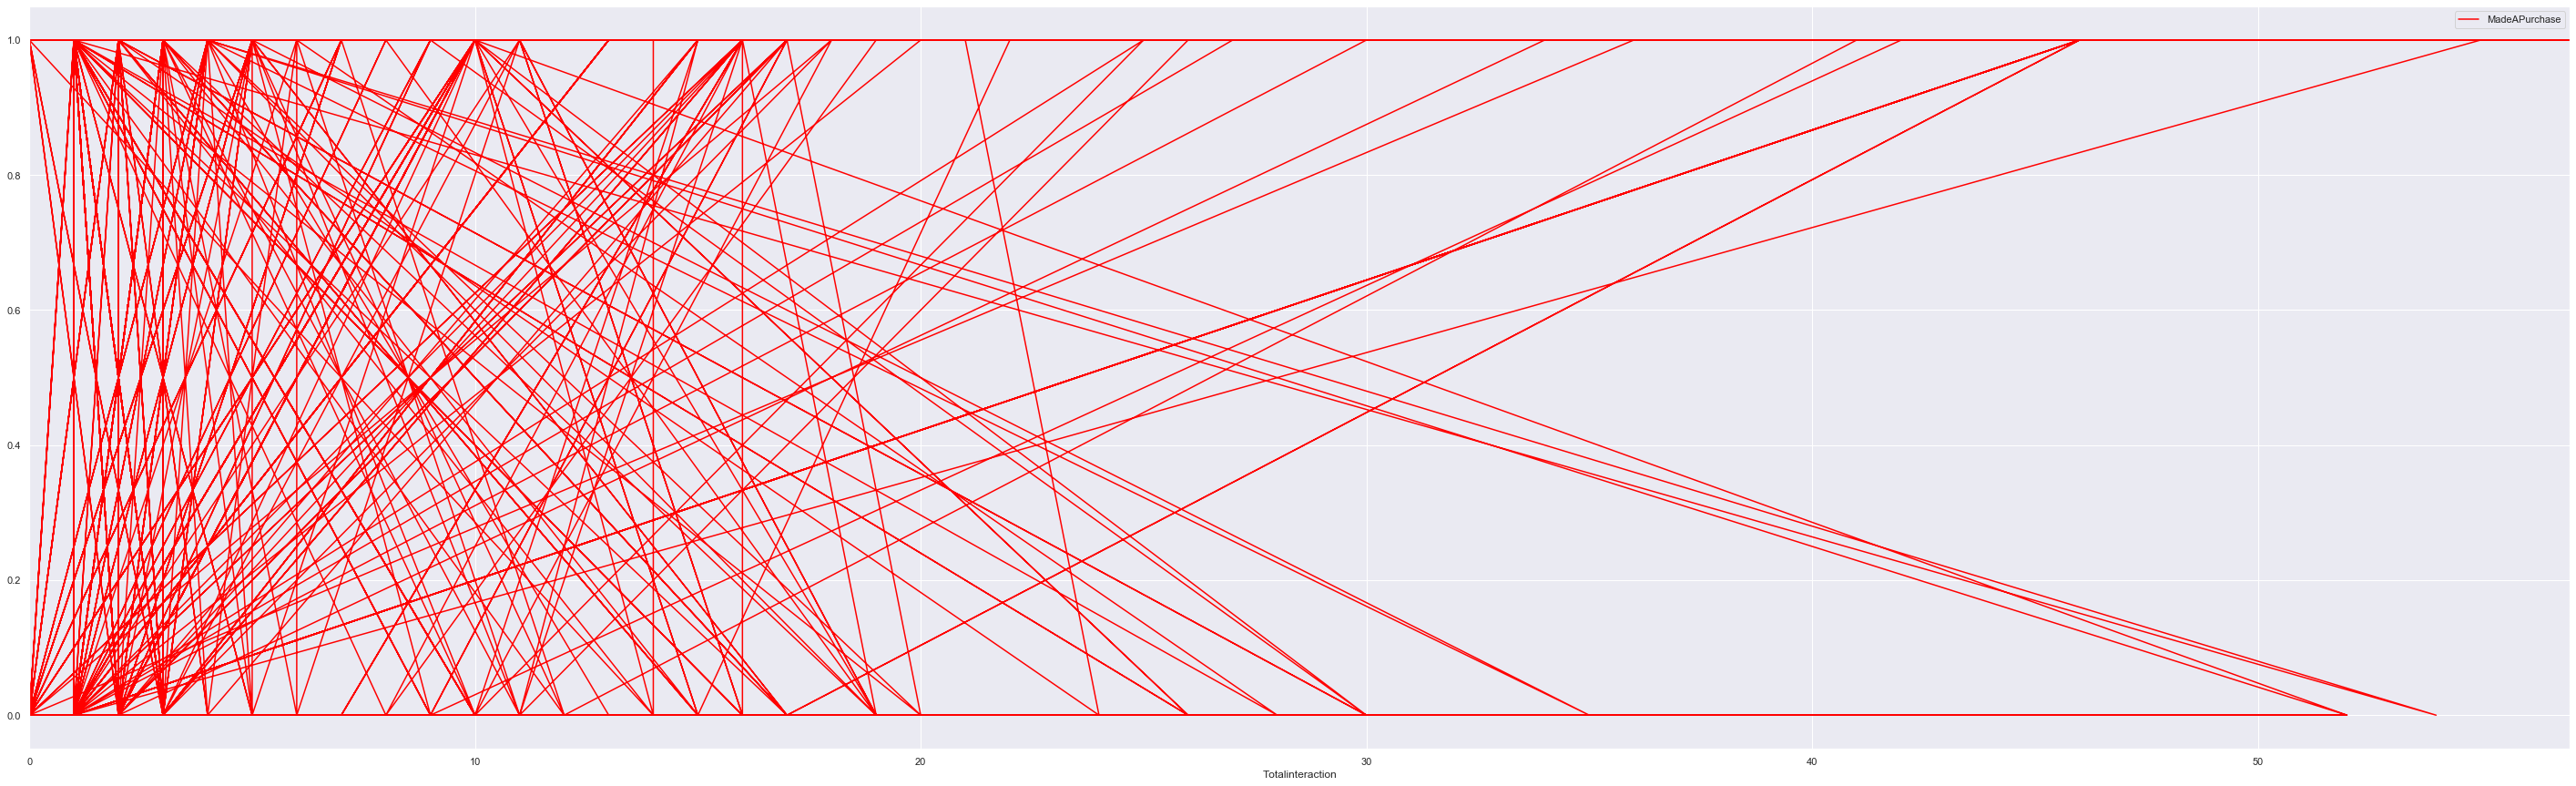

In [20]:
df1.plot(x='NumCalls', y= 'MadeAPurchase',color='Red')
df1.plot(x='NumEmails', y= 'MadeAPurchase',color='Blue')
df1.plot(x='NumDownloads', y= 'MadeAPurchase',color='Pink')
df1.plot(x='NumEvents', y= 'MadeAPurchase',color='Blue')
df1.plot(x='NumForms', y= 'MadeAPurchase',color='Black')
df1.plot(x='WebVisits', y= 'MadeAPurchase',color='Gray',kind='scatter')
df1.plot(x='Totalinteraction', y= 'MadeAPurchase',color='Red')

plt.show()

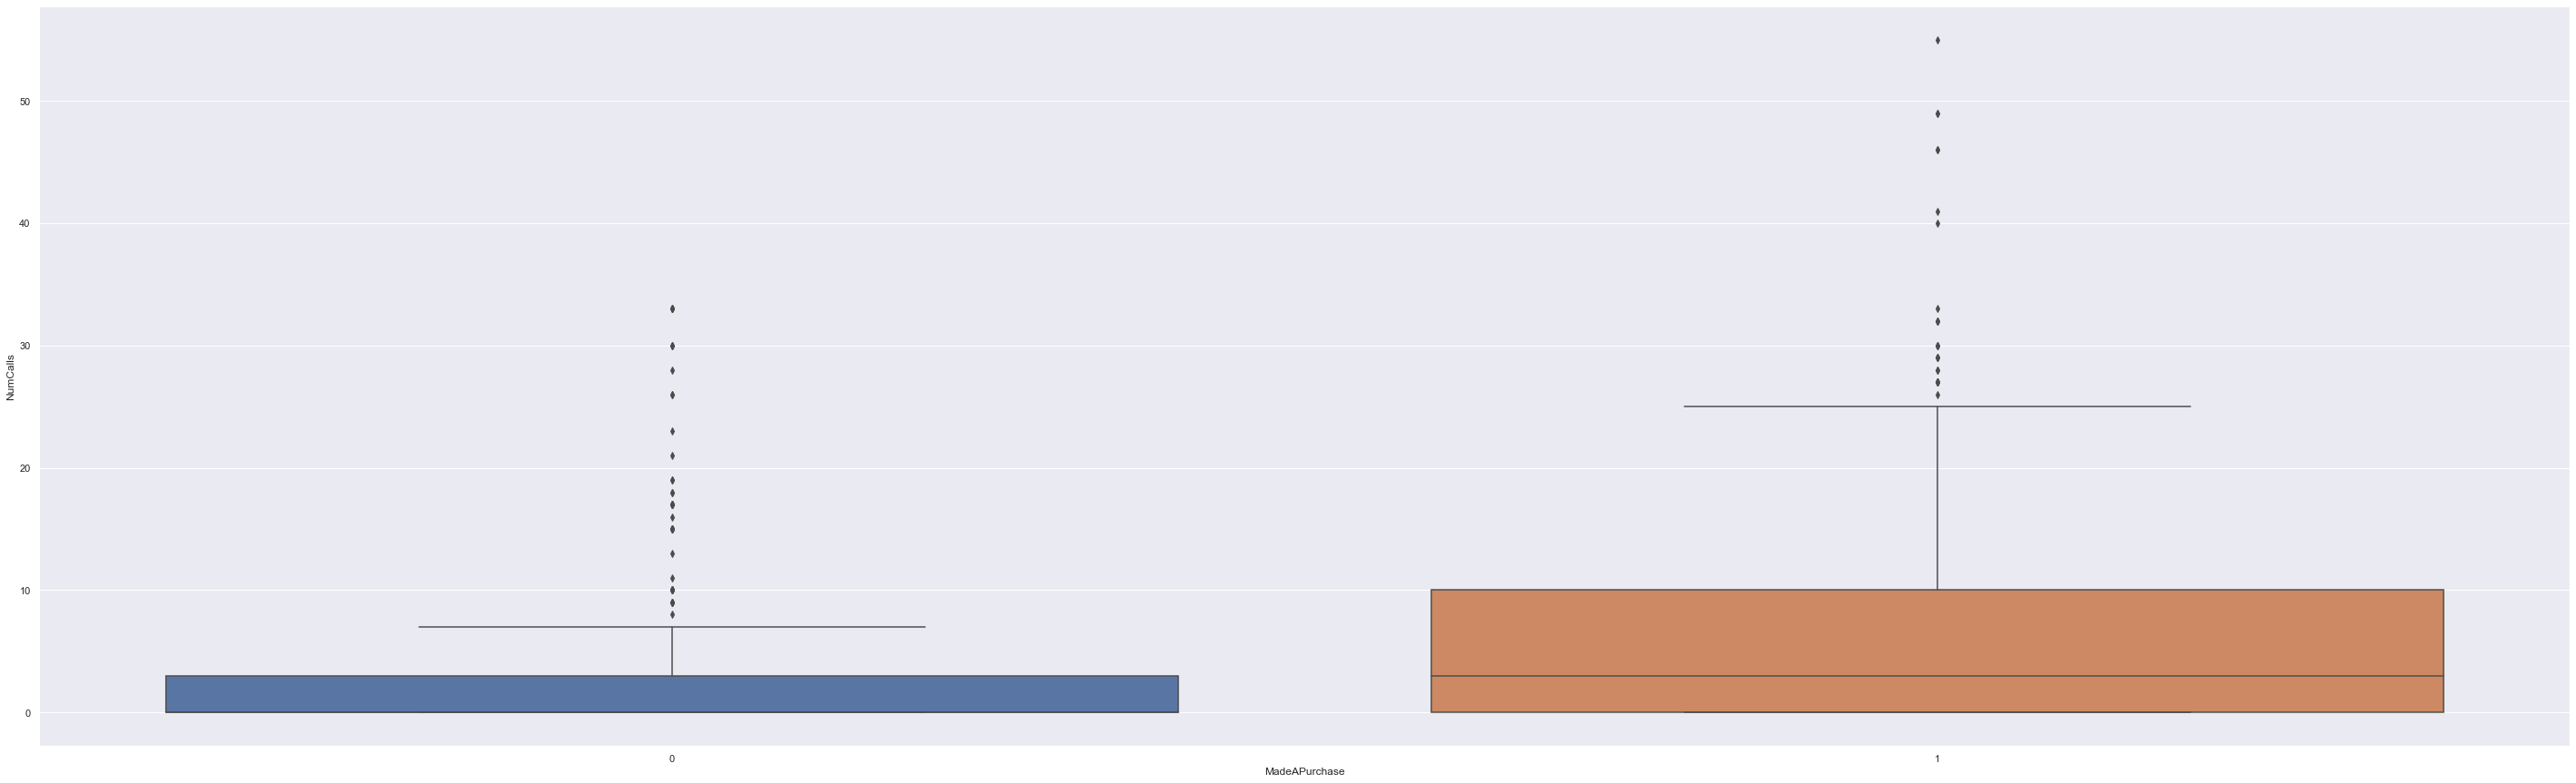

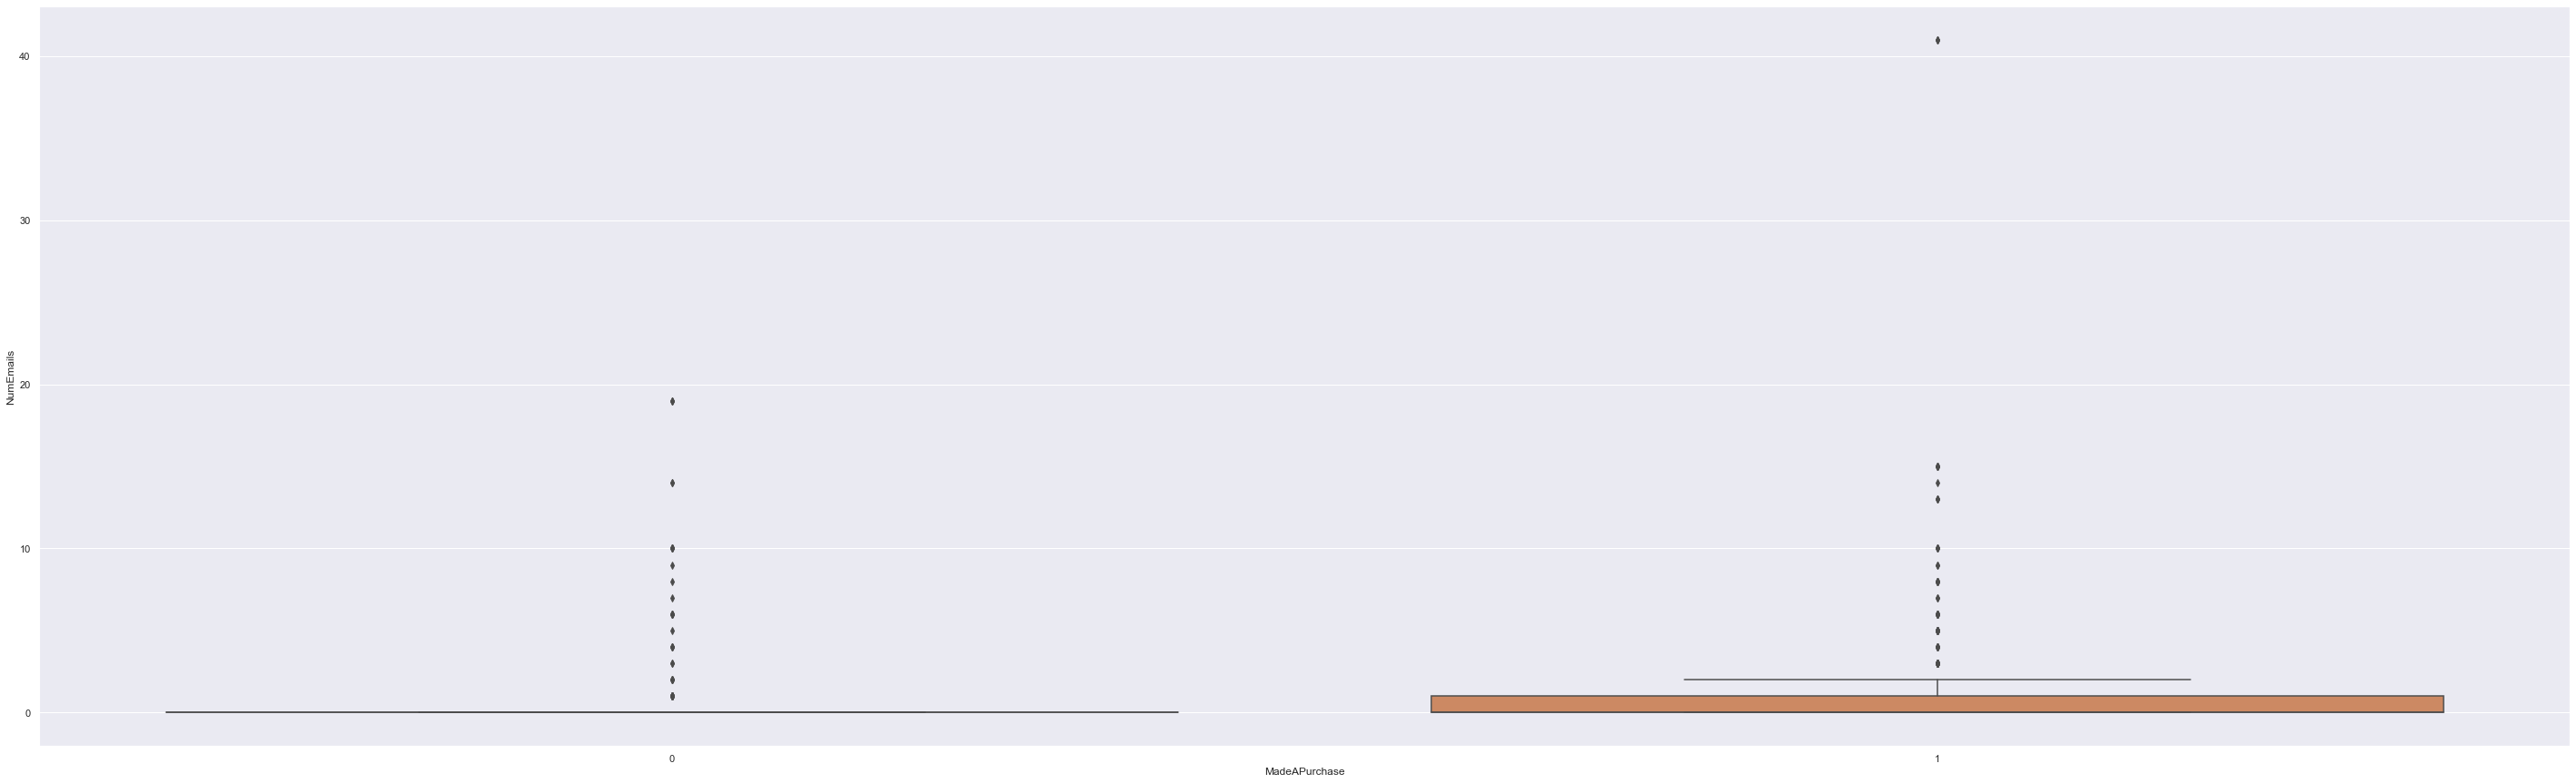

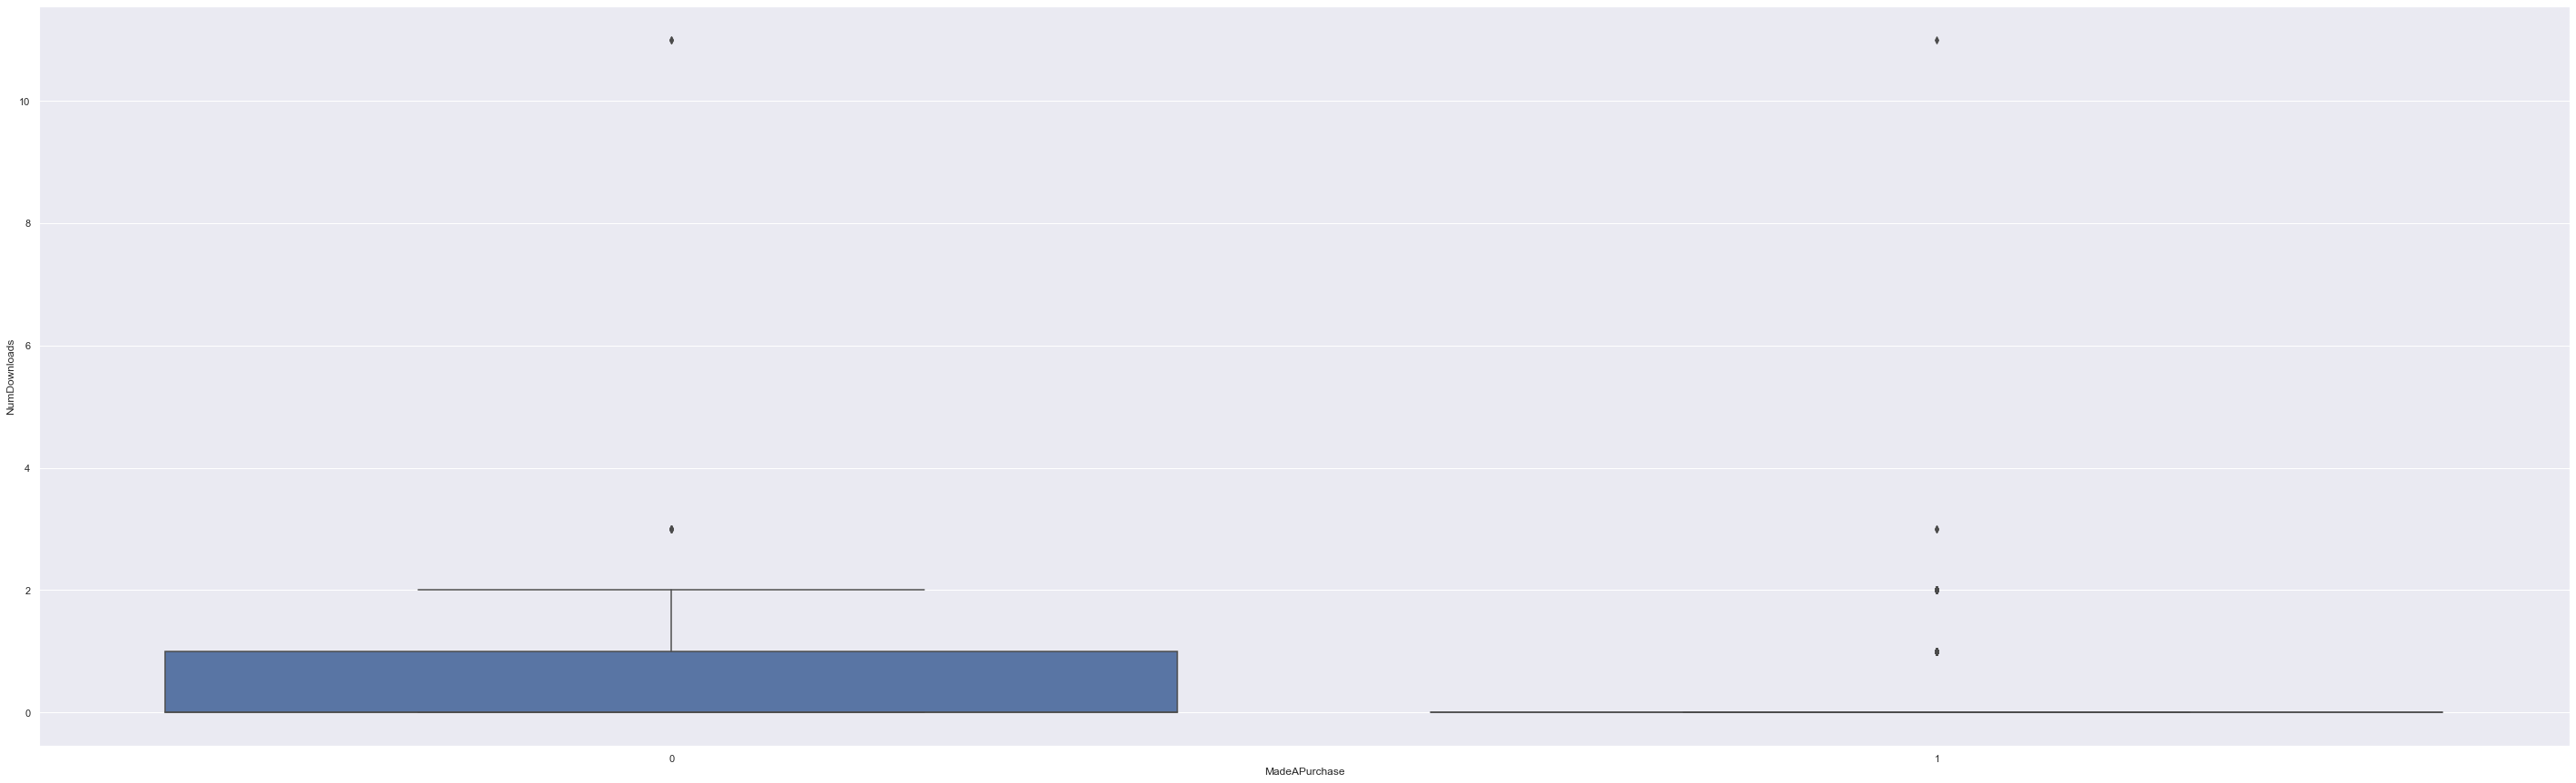

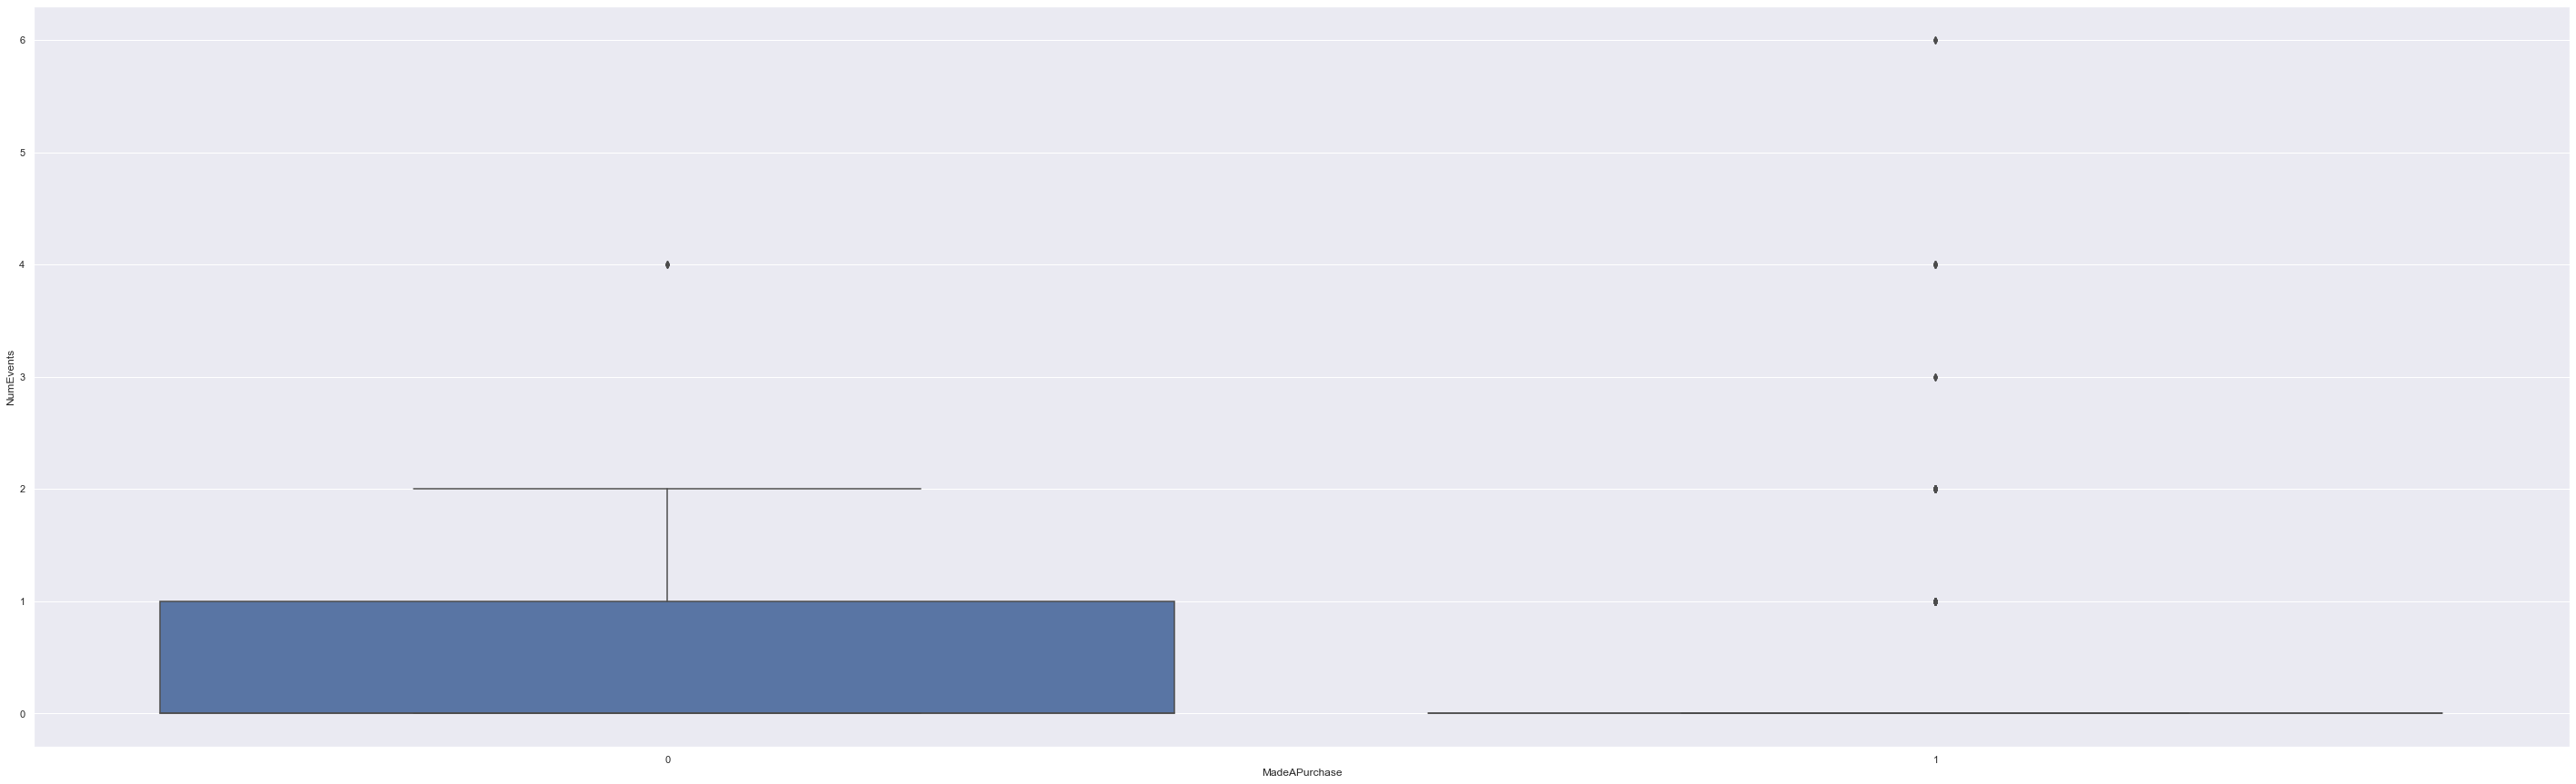

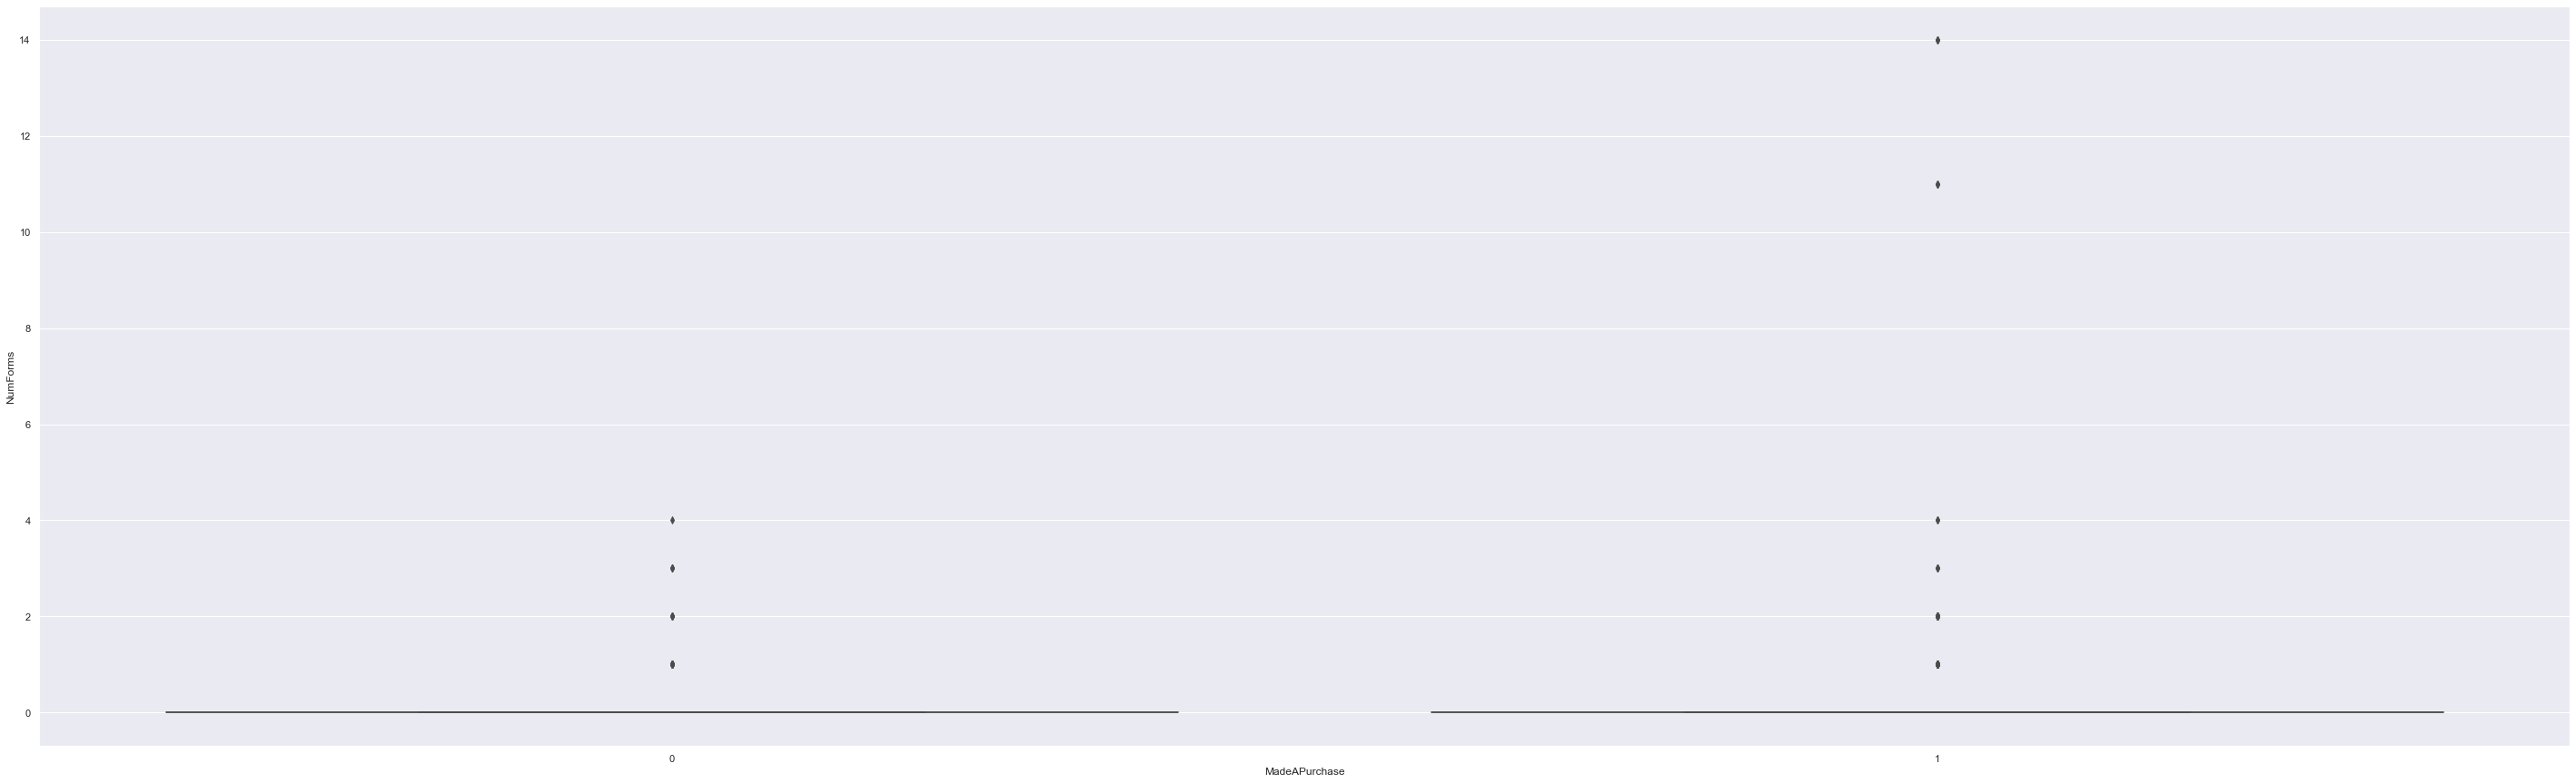

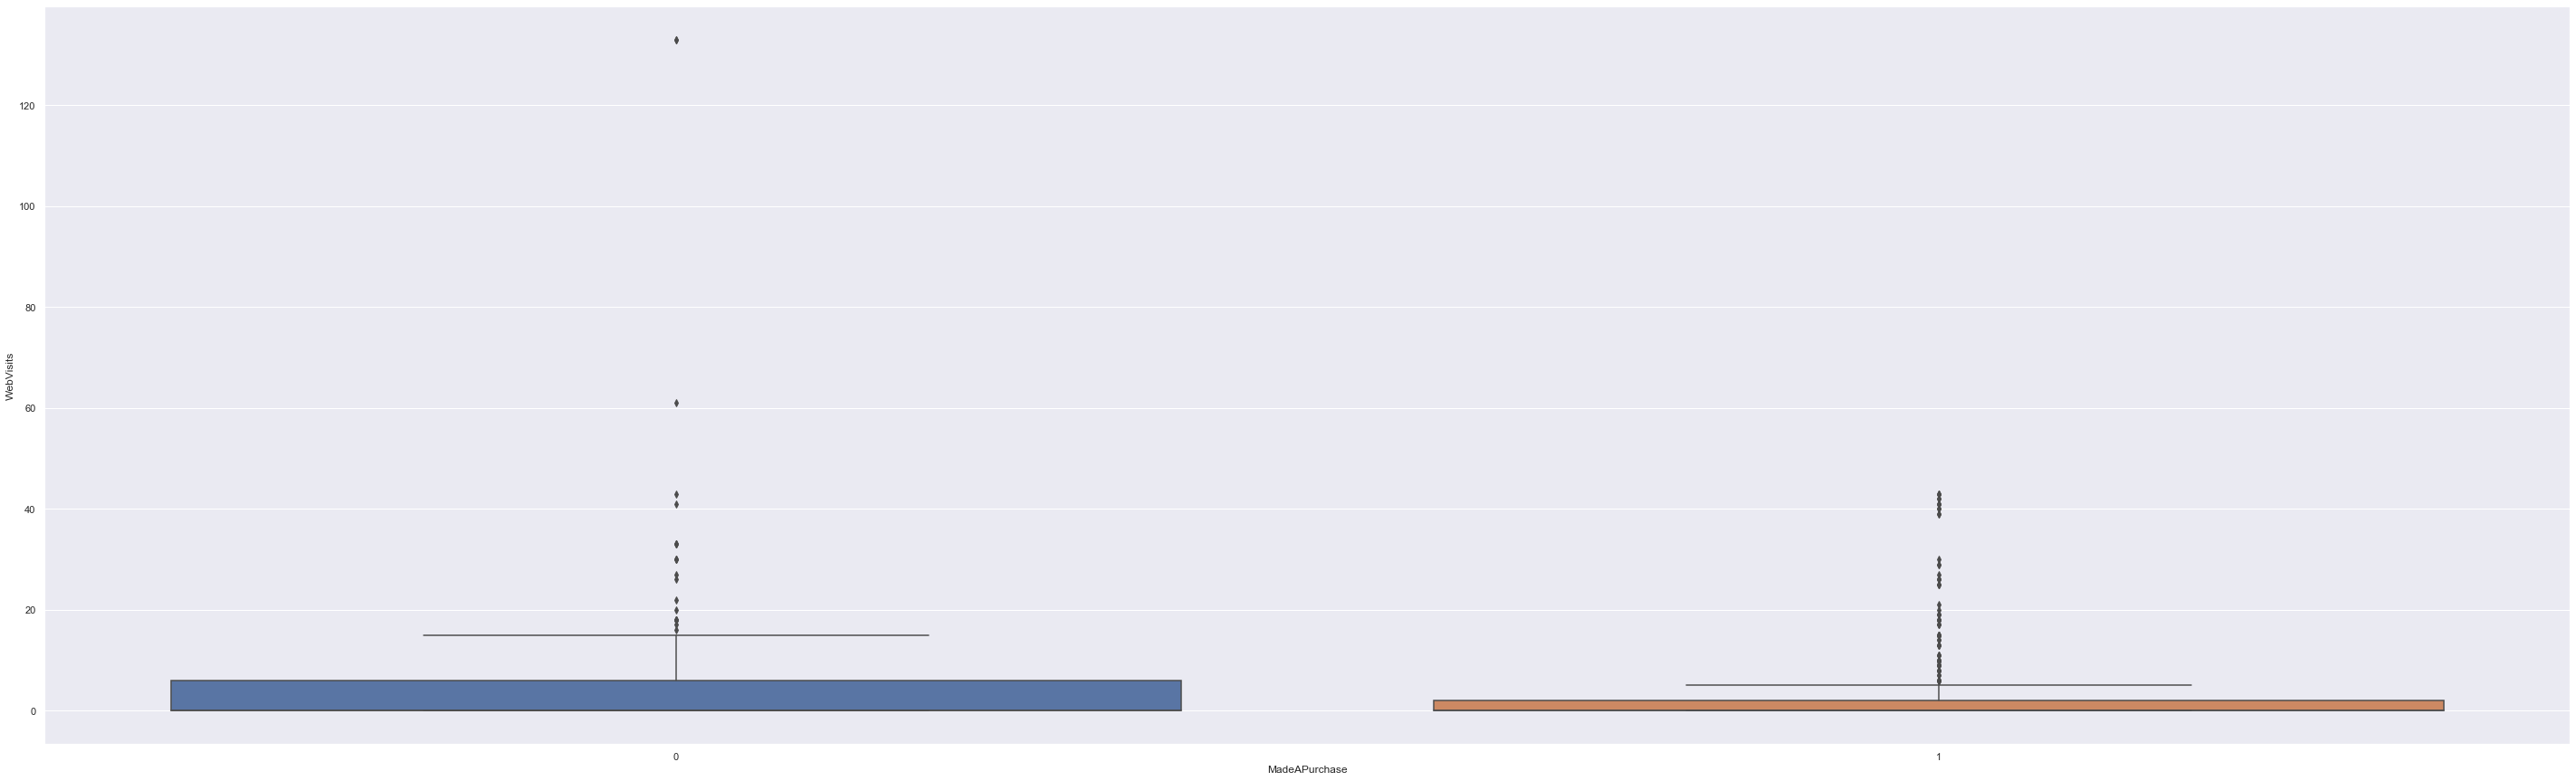

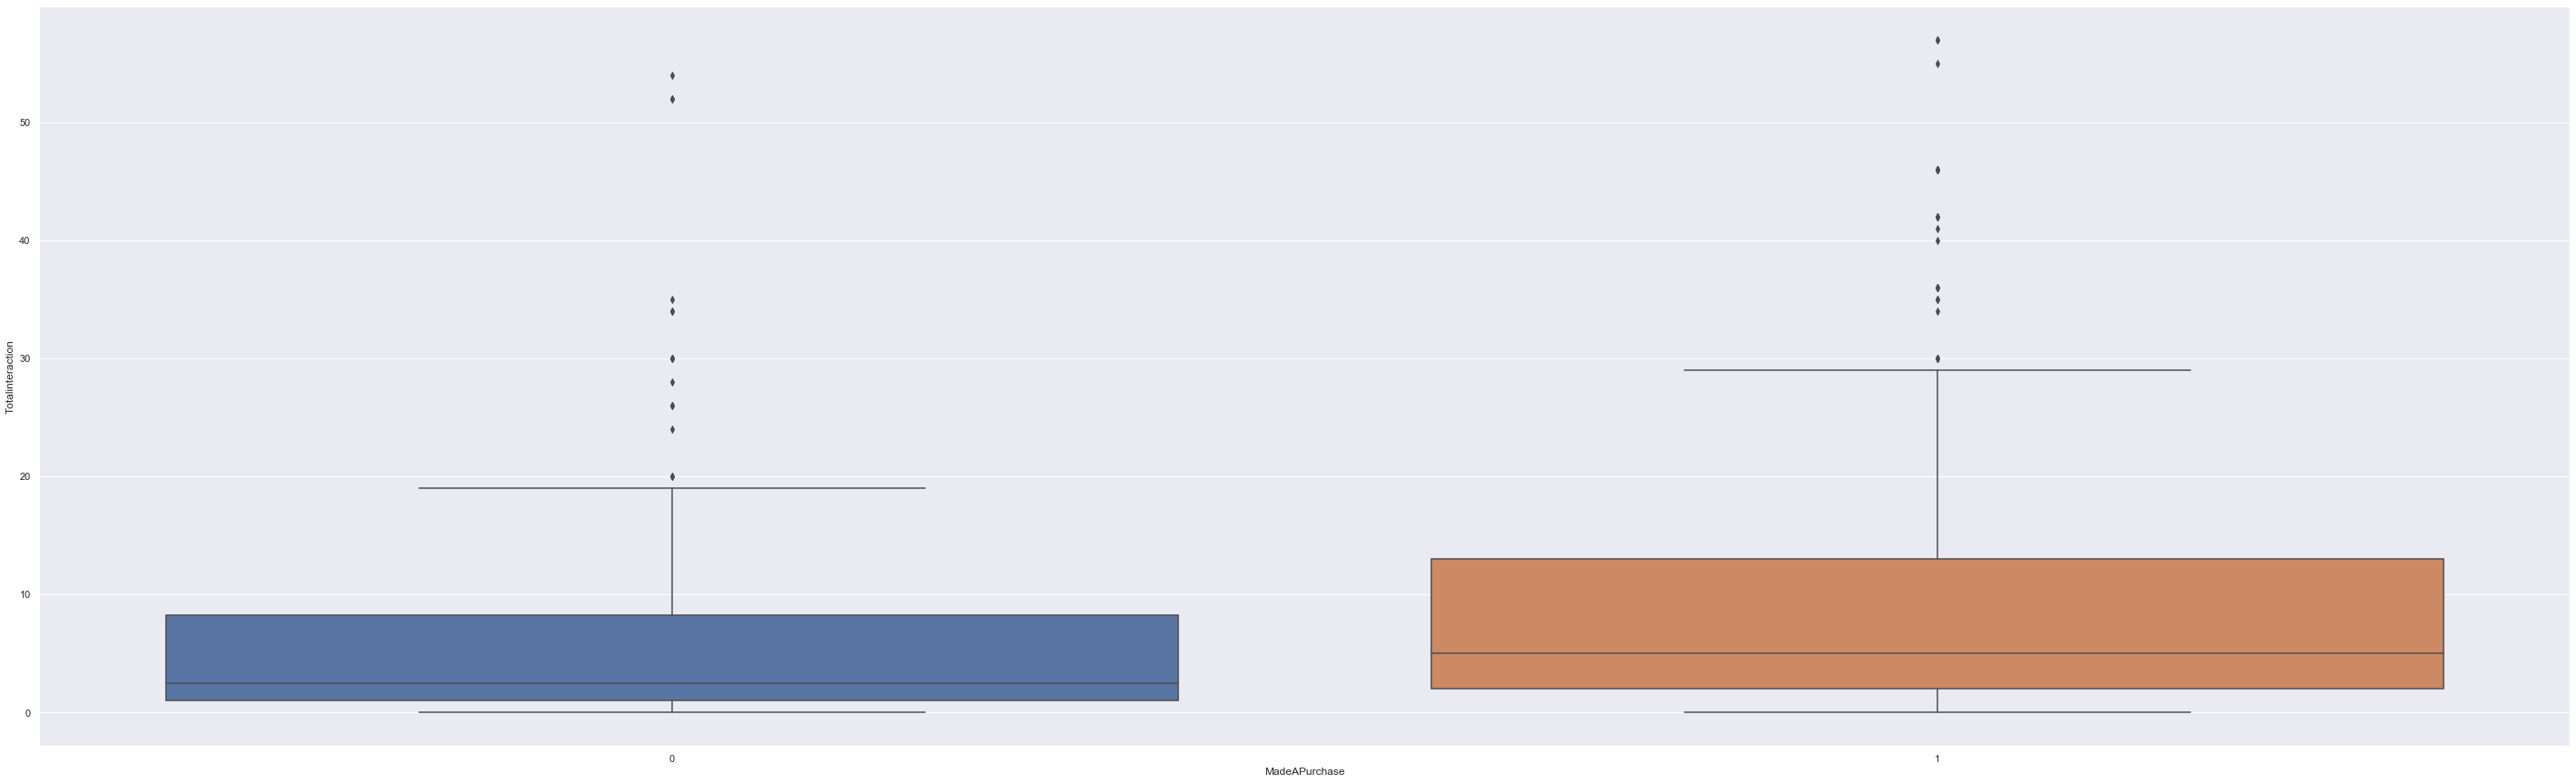

In [21]:
plt.figure(1)
sns.boxplot(y=df1['NumCalls'],x=df1['MadeAPurchase'])
plt.figure(2)
sns.boxplot(y=df1['NumEmails'],x=df1['MadeAPurchase'])
plt.figure(3)
sns.boxplot(y=df1['NumDownloads'],x=df1['MadeAPurchase'])
plt.figure(4)
sns.boxplot(y=df1['NumEvents'],x=df1['MadeAPurchase'])
plt.figure(5)
sns.boxplot(y=df1['NumForms'],x=df1['MadeAPurchase'])
plt.figure(6)
sns.boxplot(y=df1['WebVisits'],x=df1['MadeAPurchase'])
plt.figure(7)
sns.boxplot(y=df1['Totalinteraction'],x=df1['MadeAPurchase'])
plt.show()

In [22]:
df1['MadeAPurchase'].value_counts()

1    509
0    244
Name: MadeAPurchase, dtype: int64

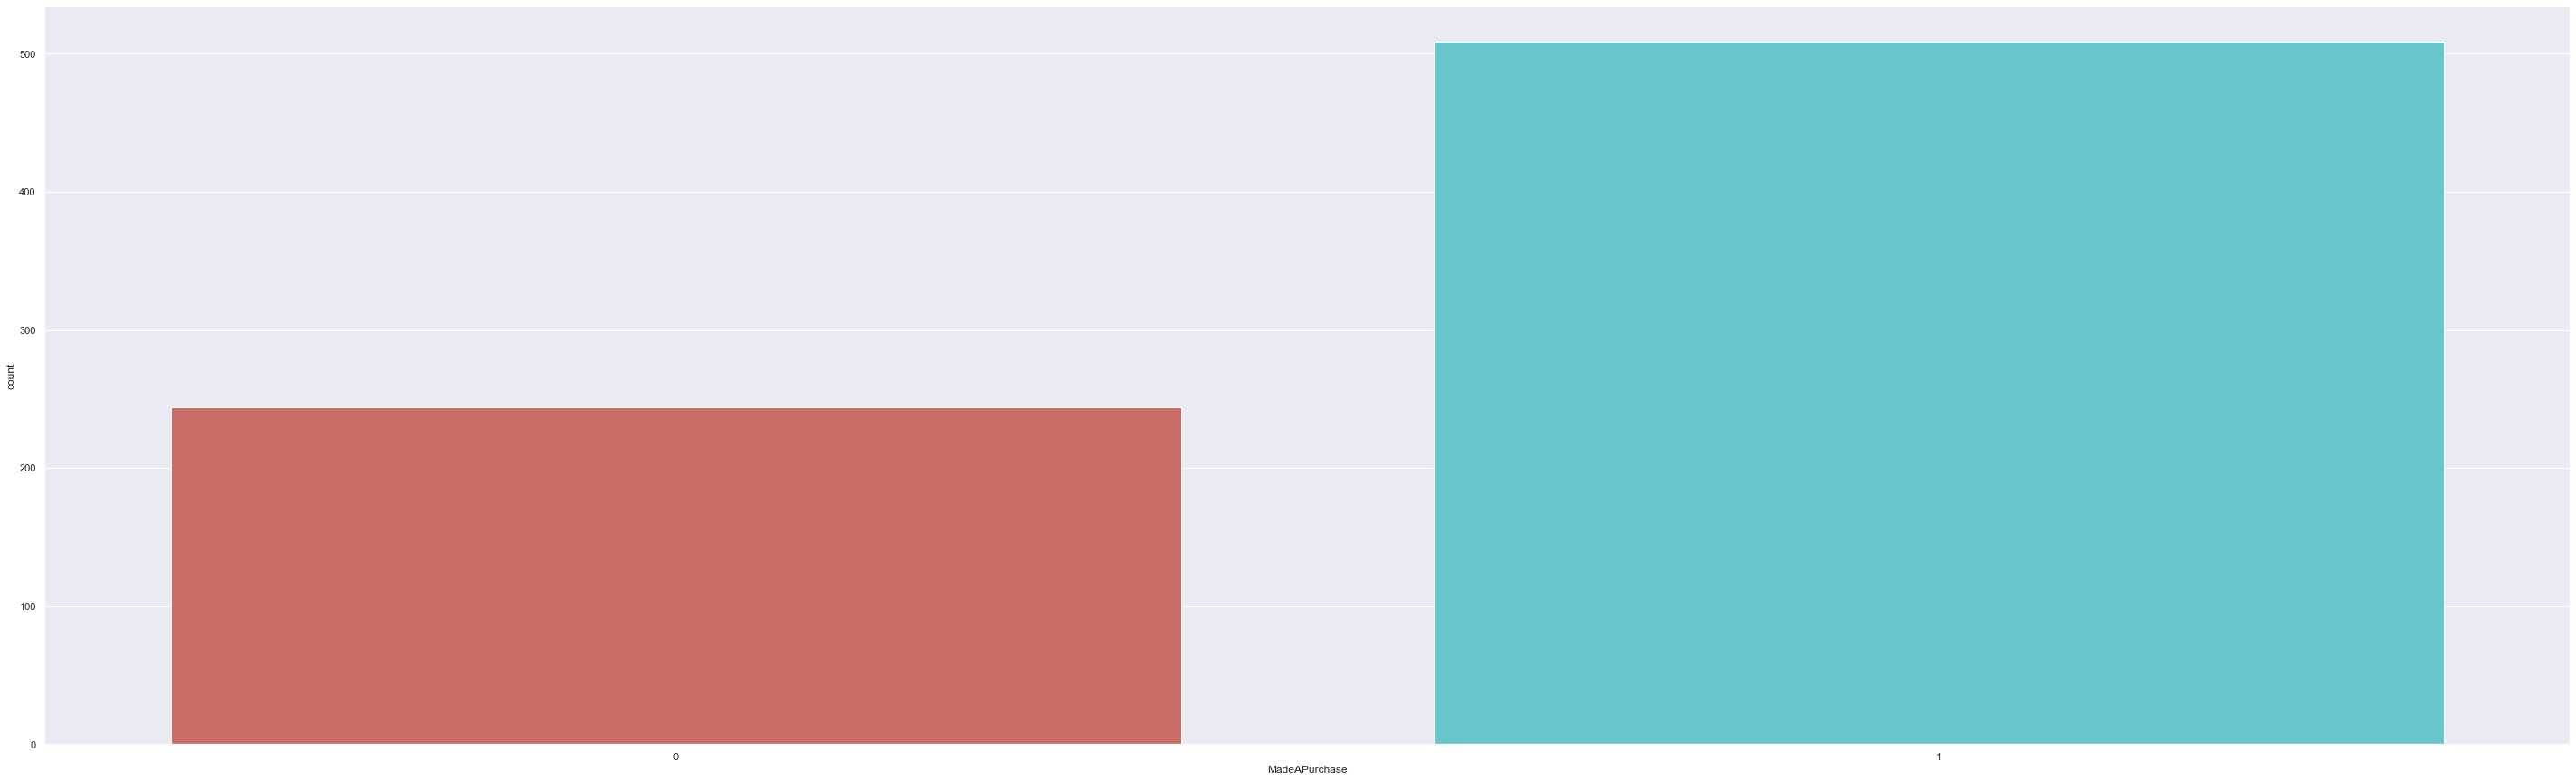

<Figure size 3600x1080 with 0 Axes>

In [23]:
sns.countplot(x='MadeAPurchase',data=df1,palette='hls')
plt.show()
plt.savefig('count_plot')

In [24]:
count_no_sub=len(df1[df1['MadeAPurchase']==0])
count_sub = len (df1[df1['MadeAPurchase']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("Percentage of no MadeAPurchage is", pct_of_no_sub*100)
pct_of_sub= count_sub/(count_no_sub+count_sub)
print("Percentage of MadeAPurchage is", pct_of_sub*100)

Percentage of no MadeAPurchage is 32.40371845949535
Percentage of MadeAPurchage is 67.59628154050465


In [25]:
df1.groupby('MadeAPurchase').mean()

NumCalls  NumEmails  NumDownloads  NumEvents  NumForms  \
MadeAPurchase                                                           
0              3.868852   0.983607      0.676230   0.516393  0.151639   
1              6.943026   1.428291      0.206287   0.255403  0.320236   

               WebVisits  PageVisits  PriorClient  Totalinteraction  
MadeAPurchase                                                        
0               5.642857    4.268908     0.737705          6.196721  
1               3.528942    3.349301     0.595285          9.153242

In [26]:
df1.groupby('NumCalls').mean()

NumEmails  NumDownloads  NumEvents  NumForms  WebVisits  PageVisits  \
NumCalls                                                                        
0          1.959596      0.575758   0.629630  0.225589   4.920415    4.162630   
1          0.214286      0.428571   0.392857  0.464286   1.987952    2.445783   
2          1.722222      0.083333   0.000000  0.472222   4.750000    2.722222   
3          0.780488      0.292683   0.073171  0.268293   2.750000    4.025000   
4          0.928571      0.071429   0.214286  0.178571   1.000000    4.571429   
5          1.000000      0.000000   0.000000  0.200000   5.400000    1.333333   
6          0.000000      0.000000   0.000000  0.000000   3.000000    0.750000   
7          3.666667      0.166667   0.000000  0.000000   3.333333   20.500000   
8          0.000000      0.000000   0.000000  0.000000   2.142857    1.571429   
9          0.500000      0.100000   0.100000  0.100000   1.800000    5.033333   
10         0.866667      0.100000   0.050000  0.000000   4.344828    1.741379   
11         0.200000      0.200000   0.200000  0.000000   5.600000    1.733333   
13         0.500000      0.000000   0.000000  0.000000   7.833333    0.666667   
14         0.000000      0.000000   0.000000  0.000000   3.000000    1.000000   
15         0.750000      0.000000   0.000000  0.125000   5.000000    2.125000   
16         0.000000      0.000000   0.000000  0.000000   2.666667    9.750000   
17         0.000000      0.200000   0.200000  0.200000   1.933333    8.000000   
18         1.000000      0.000000   0.000000  0.000000   6.000000    0.333333   
19         0.000000      0.000000   0.000000  0.000000   7.333333    5.000000   
20         0.000000      0.000000   0.000000  0.000000   0.666667    0.000000   
21         4.666667      0.666667   0.000000  4.666667  15.333333    3.333333   
22         0.000000      0.000000   0.000000  0.000000  15.000000    6.333333   
23         1.000000      0.000000   0.000000  0.000000   7.666667    0.666667   
24         0.000000      2.000000   2.000000  0.000000   0.000000    2.000000   
25         0.000000      0.000000   0.000000  0.000000   9.000000    0.333333   
26         0.000000      0.000000   0.000000  0.000000  10.000000    6.666667   
27         0.000000      0.000000   0.000000  0.000000   1.833333    7.500000   
28         0.000000      0.000000   0.000000  0.000000   0.000000    6.666667   
29         0.000000      0.000000   0.000000  0.000000   9.666667    1.333333   
30         0.000000      1.000000   0.500000  1.000000   9.666667    0.333333   
32         0.000000      2.000000   2.000000  0.000000   0.000000    3.000000   
33         9.500000      0.666667   0.000000  0.166667   3.333333    0.000000   
40         0.000000      0.000000   0.000000  0.000000   0.000000    0.000000   
41         0.000000      0.000000   0.000000  0.000000   0.000000    1.000000   
46         0.000000      0.000000   0.000000  0.000000   5.000000    0.000000   
49         7.000000      1.000000   0.000000  0.000000   0.000000    0.000000   
55         0.000000      0.000000   0.000000  0.000000   0.000000    0.000000   

          PriorClient  MadeAPurchase  Totalinteraction  
NumCalls                                                
0            0.777778       0.454545          3.390572  
1            0.750000       0.892857          2.500000  
2            0.722222       0.777778          4.277778  
3            0.609756       0.829268          4.414634  
4            0.535714       0.785714          5.392857  
5            0.266667       0.933333          6.200000  
6            0.750000       0.500000          6.000000  
7            0.166667       0.833333         10.833333  
8            0.428571       0.857143          8.000000  
9            0.300000       0.833333          9.800000  
10           0.350000       0.866667         11.016667  
11           0.400000       0.933333         11.600000  
13           0.000000       0.833333         13.5000

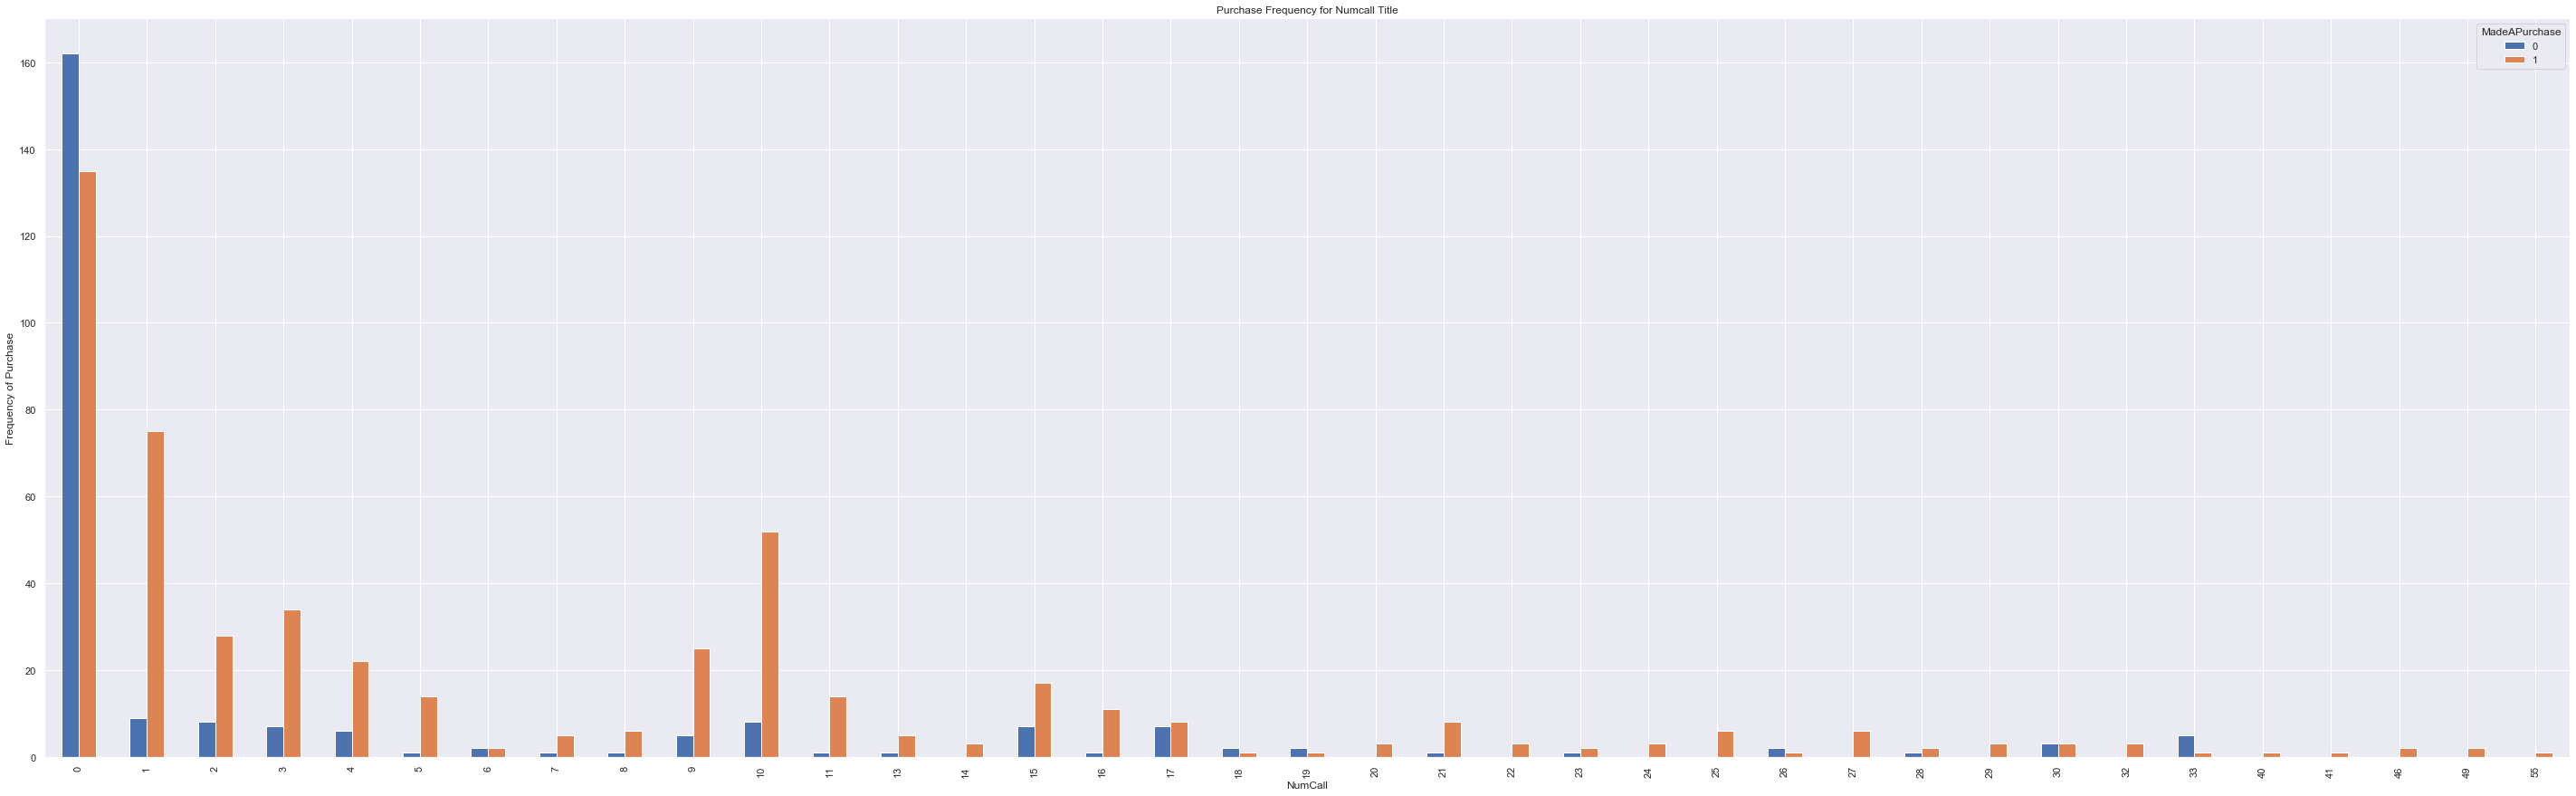

In [27]:
pd.crosstab(df1.NumCalls,df1.MadeAPurchase).plot(kind='bar')
plt.title('Purchase Frequency for Numcall Title')
plt.xlabel('NumCall')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre')

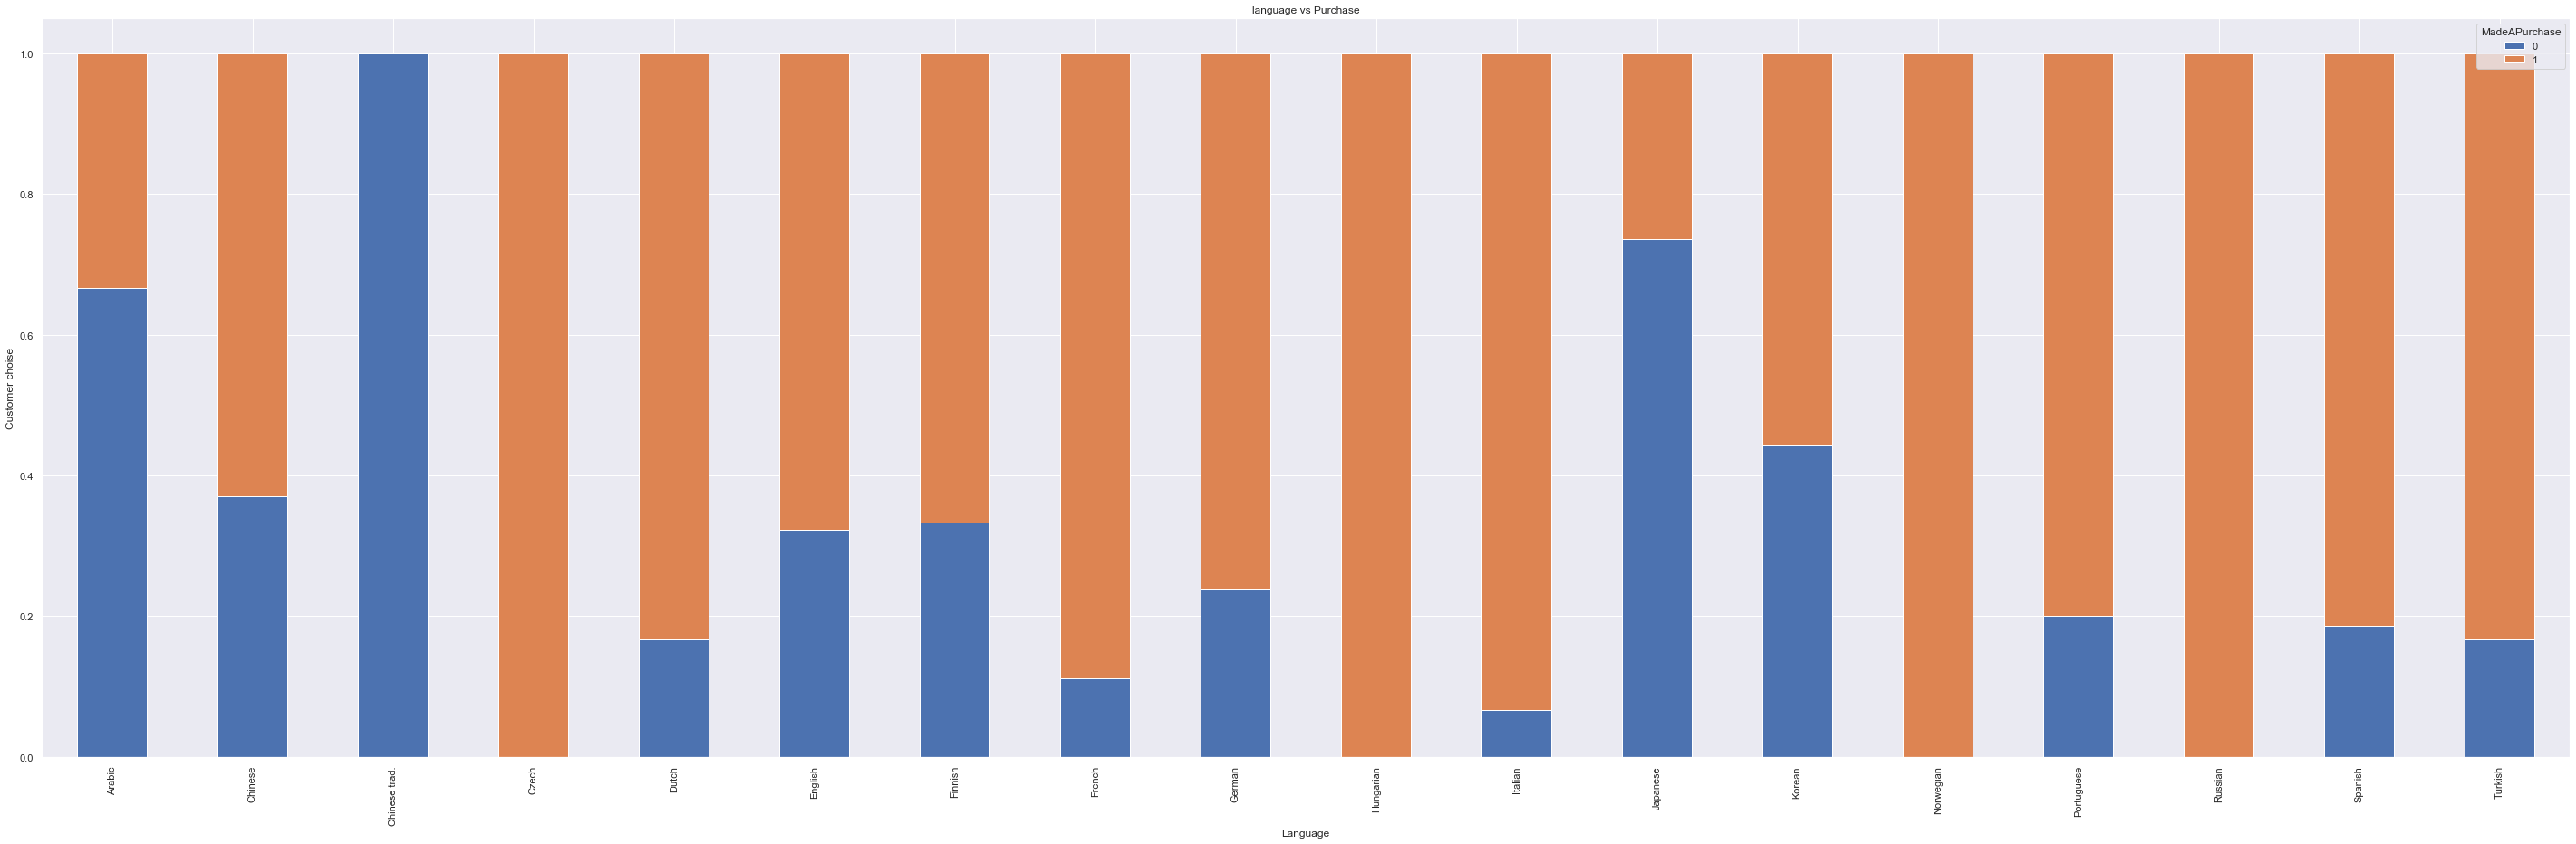

In [28]:
table=pd.crosstab(df1.Language,df1.MadeAPurchase)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('language vs Purchase')
plt.xlabel('Language')
plt.ylabel('Customer choise')
plt.savefig('Language_vs_MadeAPurchase')

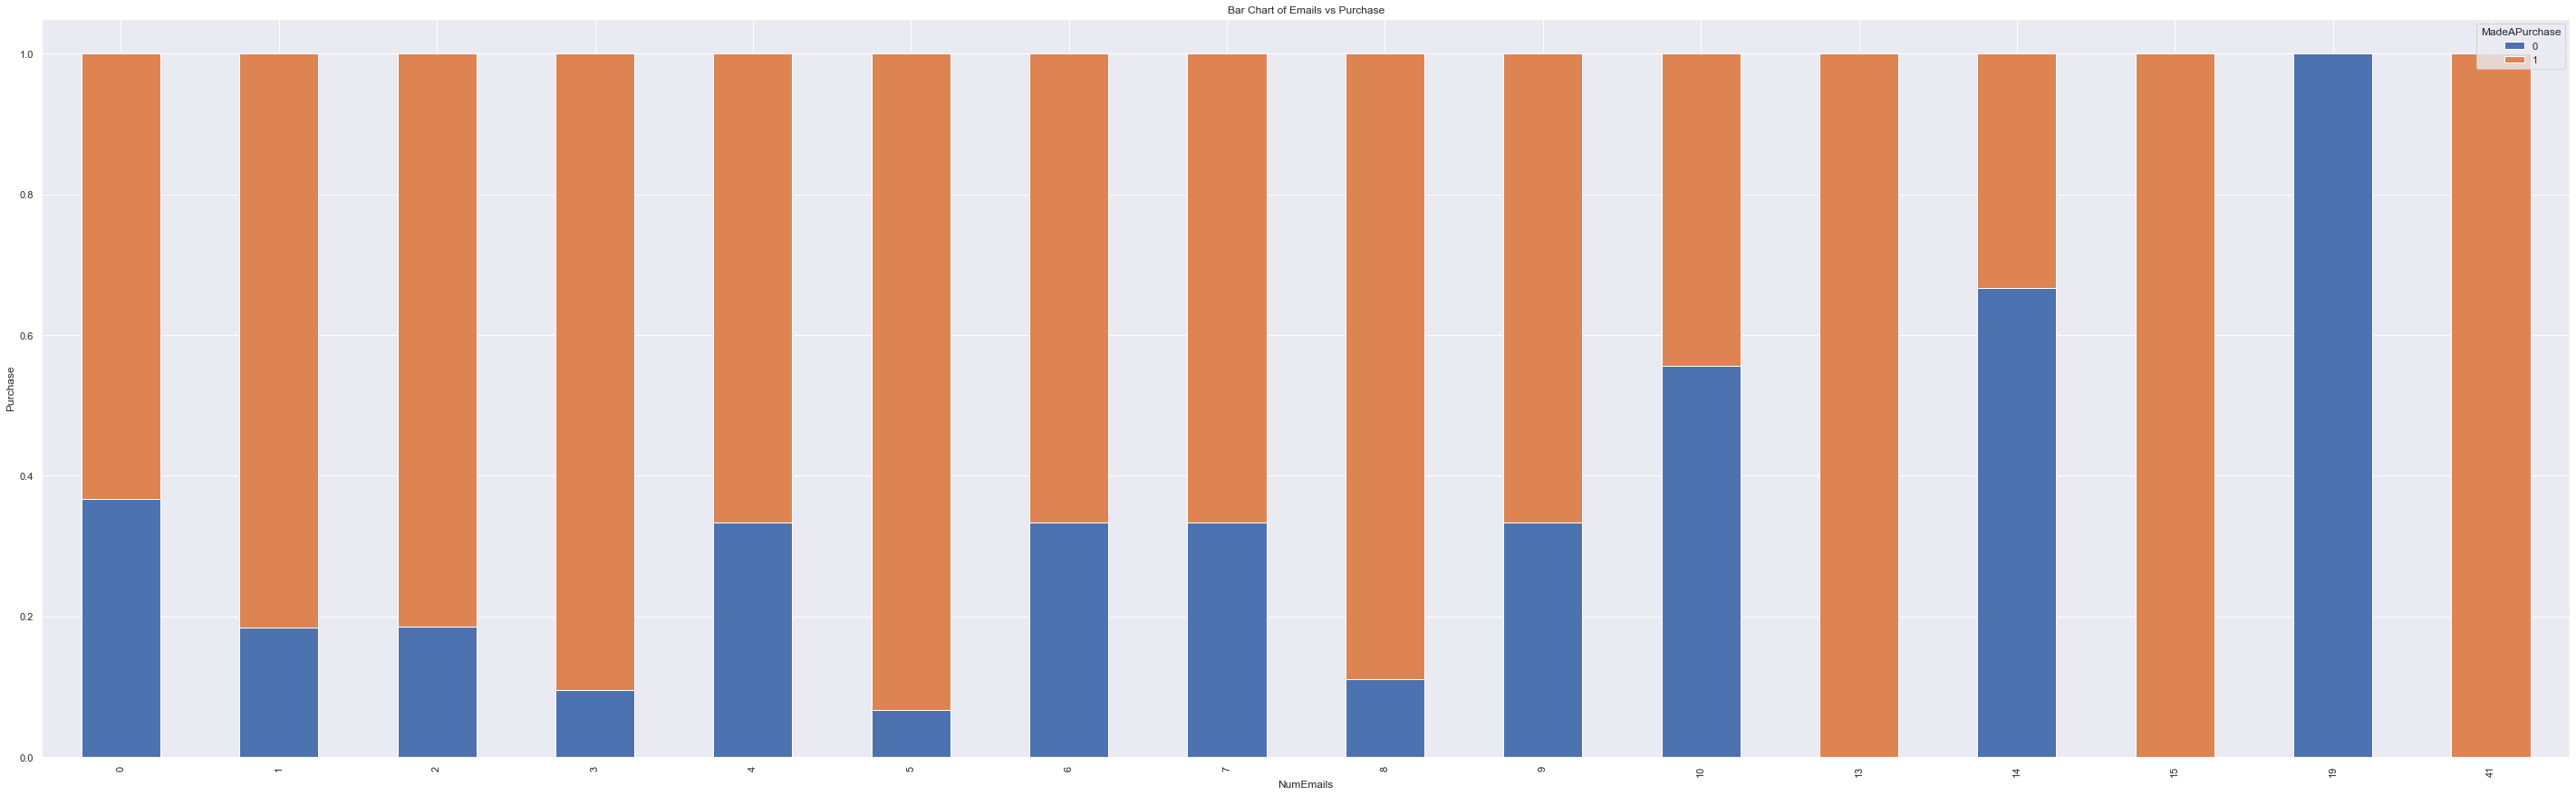

In [29]:
table=pd.crosstab(df1.NumEmails,df1.MadeAPurchase)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Bar Chart of Emails vs Purchase')
plt.xlabel('NumEmails')
plt.ylabel('Purchase')
plt.savefig('Purchase_vs_Emails')

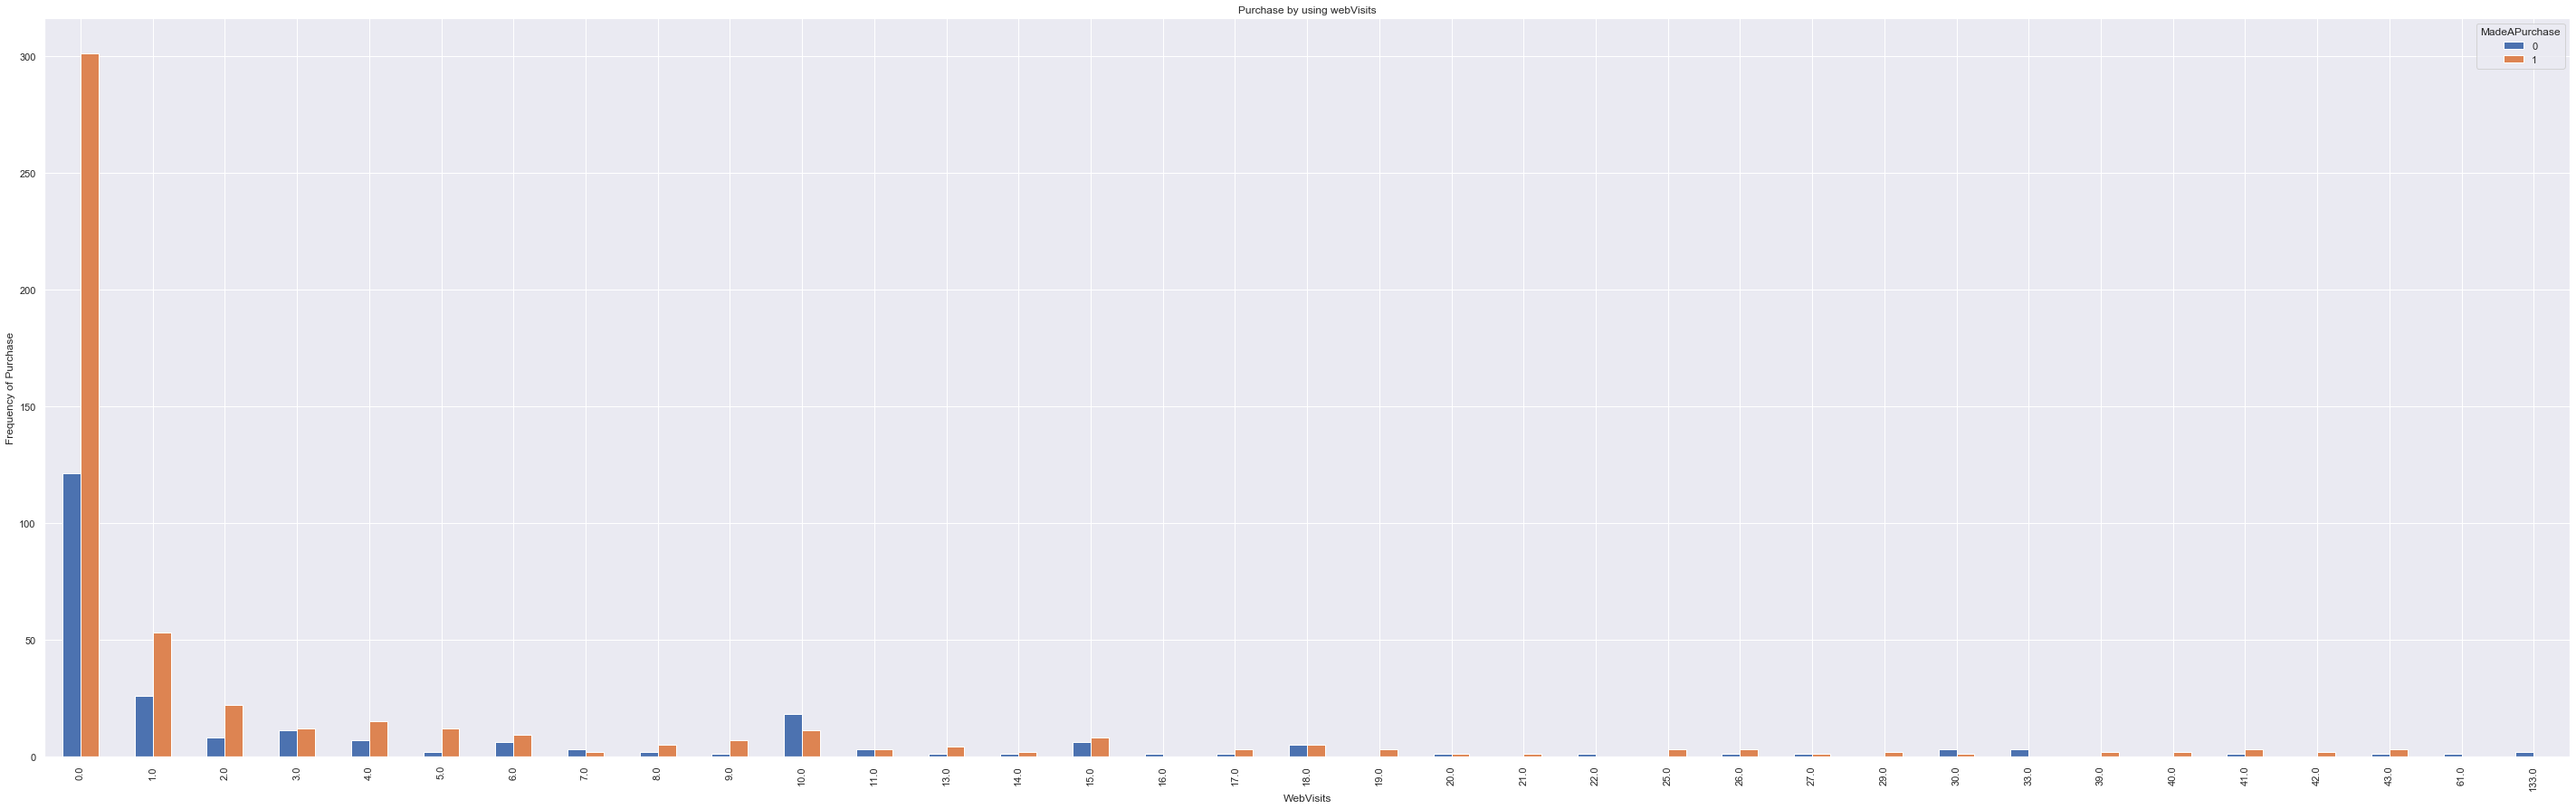

In [30]:
pd.crosstab(df1.WebVisits,df1.MadeAPurchase).plot(kind='bar')
plt.title('Purchase by using webVisits')
plt.xlabel('WebVisits')
plt.ylabel('Frequency of Purchase')
plt.savefig('Website_vs_Purchase')

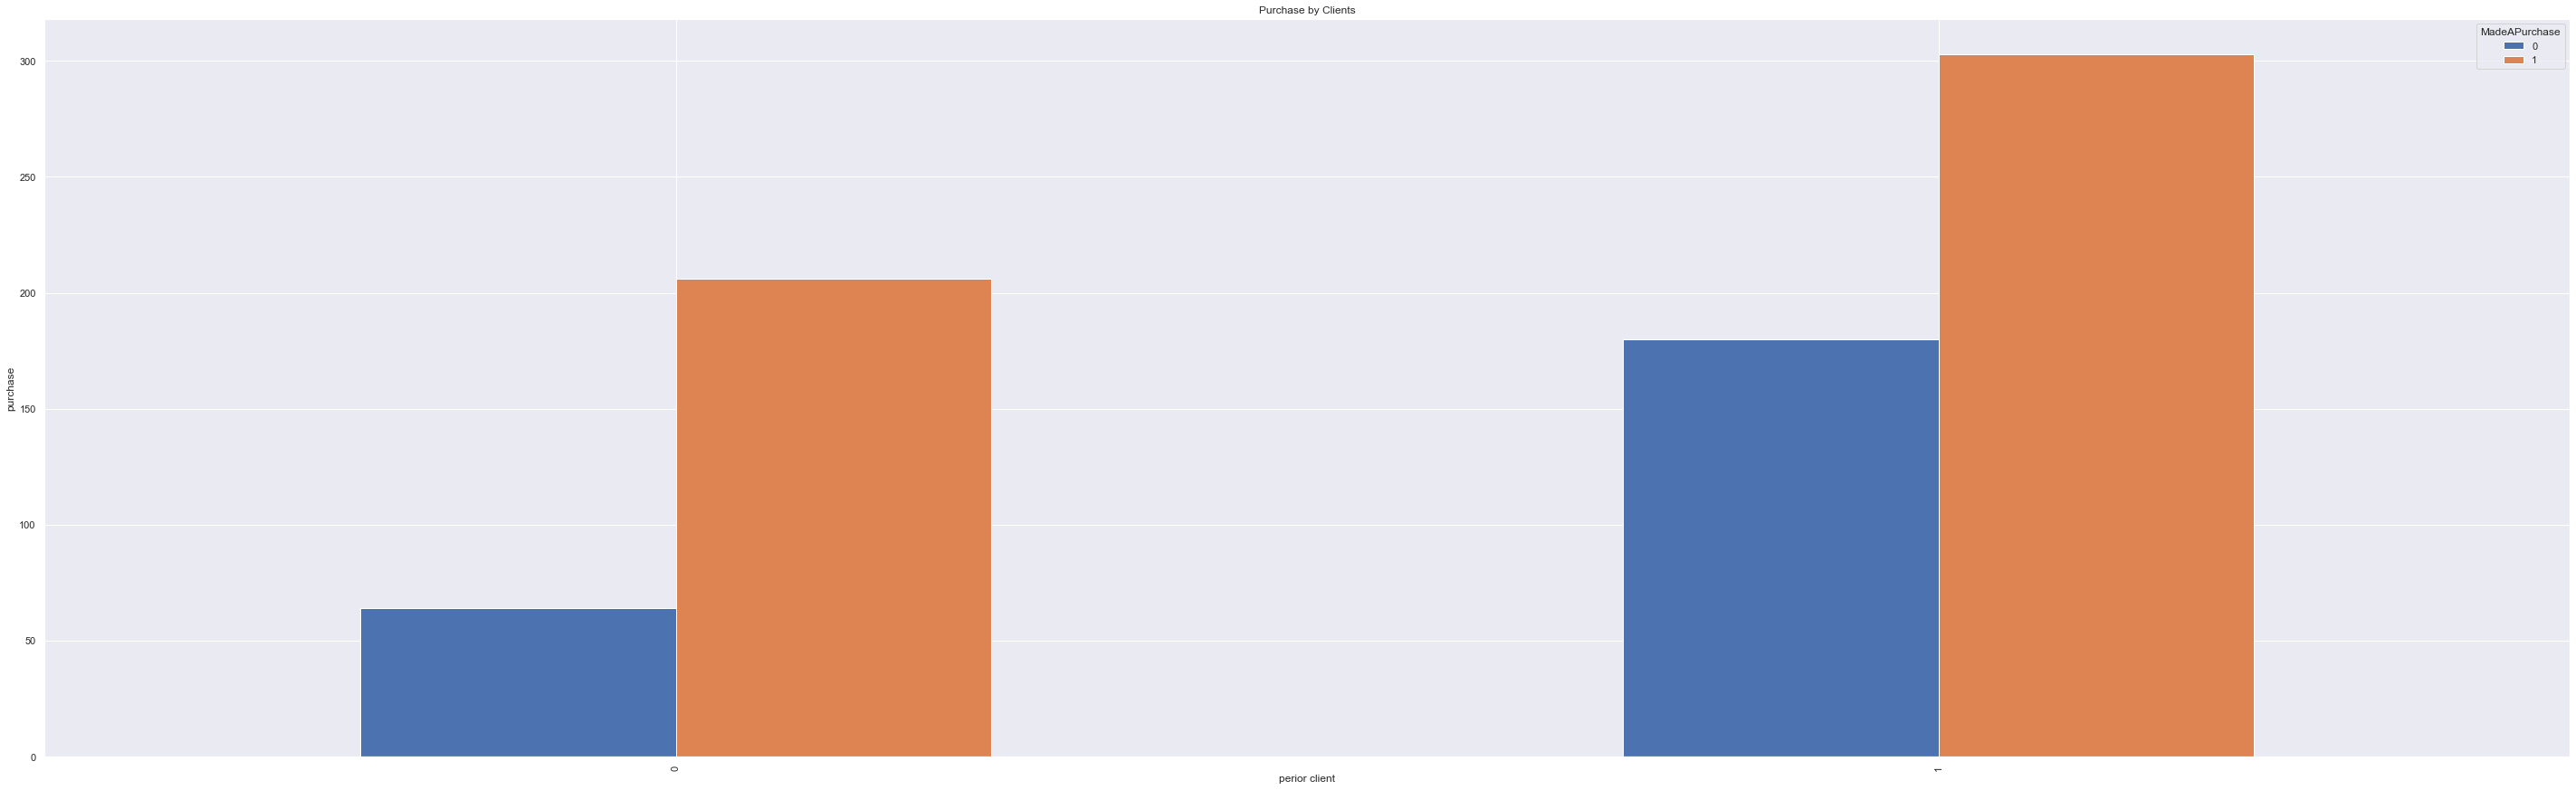

In [31]:
pd.crosstab(df1.PriorClient,df1.MadeAPurchase).plot(kind='bar')
plt.title('Purchase by Clients')
plt.xlabel('perior client')
plt.ylabel('purchase')
plt.savefig('perior client_vs_Purchase')

In [32]:
df2=df1.drop(['Language','Country'],axis=1)
df2

NumCalls  NumEmails  NumDownloads  NumEvents  NumForms  WebVisits  \
0           9          2             1          1         1        0.0   
1           9          2             1          1         1        1.0   
2           9          2             1          1         1        1.0   
3           0          2             0          0         0        4.0   
4          15          0             0          0         0       11.0   
..        ...        ...           ...        ...       ...        ...   
748         1          0             0          0         0        1.0   
749         0          0             0          0         1        0.0   
750        10          0             0          0         0        0.0   
751         9          1             0          0         0        0.0   
752        27          0             0          0         0        0.0   

     PageVisits  PriorClient  MadeAPurchase  Totalinteraction  
0           1.0            1              1                14  
1           0.0            1              1                14  
2           0.0            1              0                14  
3           0.0            1              1                 2  
4           4.0            0              0                15  
..          ...          ...            ...               ...  
748         0.0            1              1                 1  
749         0.0            1              1                 1  
750         0.0            0              1                10  
751         1.0            0              1                10  
752         0.0            0              1                27  

[753 rows x 10 columns]

In [33]:
df2=df2.fillna(0)
df2.columns.values

array(['NumCalls', 'NumEmails', 'NumDownloads', 'NumEvents', 'NumForms',
       'WebVisits', 'PageVisits', 'PriorClient', 'MadeAPurchase',
       'Totalinteraction'], dtype=object)

In [34]:
values=df2.values
x=values[:,0:7]
y= values[:,8]

In [35]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [36]:
#random hyper parameter to create lr
lr=LogisticRegression(penalty='l2',dual=False,max_iter=110)
lr.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=110,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
lr.score(x,y)

0.7463479415670651

In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [39]:
kfold = KFold(n_splits=3, random_state=8)

C:\Users\ronak\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [40]:
result = cross_val_score(lr, x, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.7264276228419654


In [41]:
# New LR model, but this time hyperparameter will be tuned

from sklearn.model_selection import GridSearchCV

In [42]:
#define Grid value

dual=[True,False]
max_iter=[100,110,120,130,140]
param_grid = dict(dual=dual,max_iter=max_iter)

In [43]:
import time

lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(x, y)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.735724 using {'dual': False, 'max_iter': 100}
Execution time: 1.147930383682251 ms


In [44]:
dual=[True,False]
max_iter=[50,60,70,80,90]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)

Random search with tuning

In [45]:
from sklearn.model_selection import RandomizedSearchCV

In [46]:
random = RandomizedSearchCV(estimator=lr, param_distributions=param_grid, cv = 8, n_jobs=-1)

start_time = time.time()
random_result = random.fit(x, y)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.735722 using {'max_iter': 80, 'dual': False, 'C': 2.0}
Execution time: 0.16655540466308594 ms


In [47]:
df2

NumCalls  NumEmails  NumDownloads  NumEvents  NumForms  WebVisits  \
0           9          2             1          1         1        0.0   
1           9          2             1          1         1        1.0   
2           9          2             1          1         1        1.0   
3           0          2             0          0         0        4.0   
4          15          0             0          0         0       11.0   
..        ...        ...           ...        ...       ...        ...   
748         1          0             0          0         0        1.0   
749         0          0             0          0         1        0.0   
750        10          0             0          0         0        0.0   
751         9          1             0          0         0        0.0   
752        27          0             0          0         0        0.0   

     PageVisits  PriorClient  MadeAPurchase  Totalinteraction  
0           1.0            1              1                14  
1           0.0            1              1                14  
2           0.0            1              0                14  
3           0.0            1              1                 2  
4           4.0            0              0                15  
..          ...          ...            ...               ...  
748         0.0            1              1                 1  
749         0.0            1              1                 1  
750         0.0            0              1                10  
751         1.0            0              1                10  
752         0.0            0              1                27  

[753 rows x 10 columns]

In [48]:
x.shape

(753, 7)

In [49]:
y.shape

(753,)

In [50]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=0)

In [51]:
classifier= LogisticRegression(solver='saga',random_state=0)

In [52]:
classifier.fit(X_train,Y_train)

C:\Users\ronak\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
predicted_y = classifier.predict(X_test)

In [54]:
predicted_y

array([1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1.])

In [55]:
 for x in range(len(predicted_y)):
        if (predicted_y[x] == 1):
            print(x, end="\t")

0	1	3	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19	20	22	23	24	25	26	27	28	29	30	31	32	33	34	35	36	37	40	41	42	43	44	45	47	48	49	50	51	52	53	54	55	57	59	60	61	62	63	64	65	66	67	68	69	70	72	73	74	75	77	78	79	80	81	82	83	84	85	86	87	90	91	92	93	94	95	96	97	100	101	102	103	105	106	107	108	109	110	111	114	115	116	117	120	121	122	123	124	125	126	127	129	130	131	132	134	135	136	137	138	139	140	141	142	143	144	145	146	147	148	150	151	152	153	154	155	156	158	159	162	163	164	165	166	167	168	169	170	171	172	173	174	175	177	178	179	180	181	183	184	185	186	188	

The output shows the indexes of all rows who are probable candidates for subscribing to
Data. You can now give this output to the marketing team who would pick up the
contact details for each customer in the selected row and proceed with their job.
Before we put this model into production, we need to verify the accuracy of prediction

In [56]:
print('Accuracy: {:.2f}'.format(classifier.score(X_test, Y_test)))

Accuracy: 0.74


It shows that the accuracy of our model is 74% which is considered  good in most of
the applications. Thus, further tuning is required. Now, our customer is ready to run
the next campaign, get the list of potential customers and chase them for opening the data
with a probable high rate of success. 

# Model Evaluation metrics

In [57]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(Y_test,predicted_y)
print(confusion)

[[ 20  43]
 [  7 119]]


<Figure size 3600x1080 with 0 Axes>

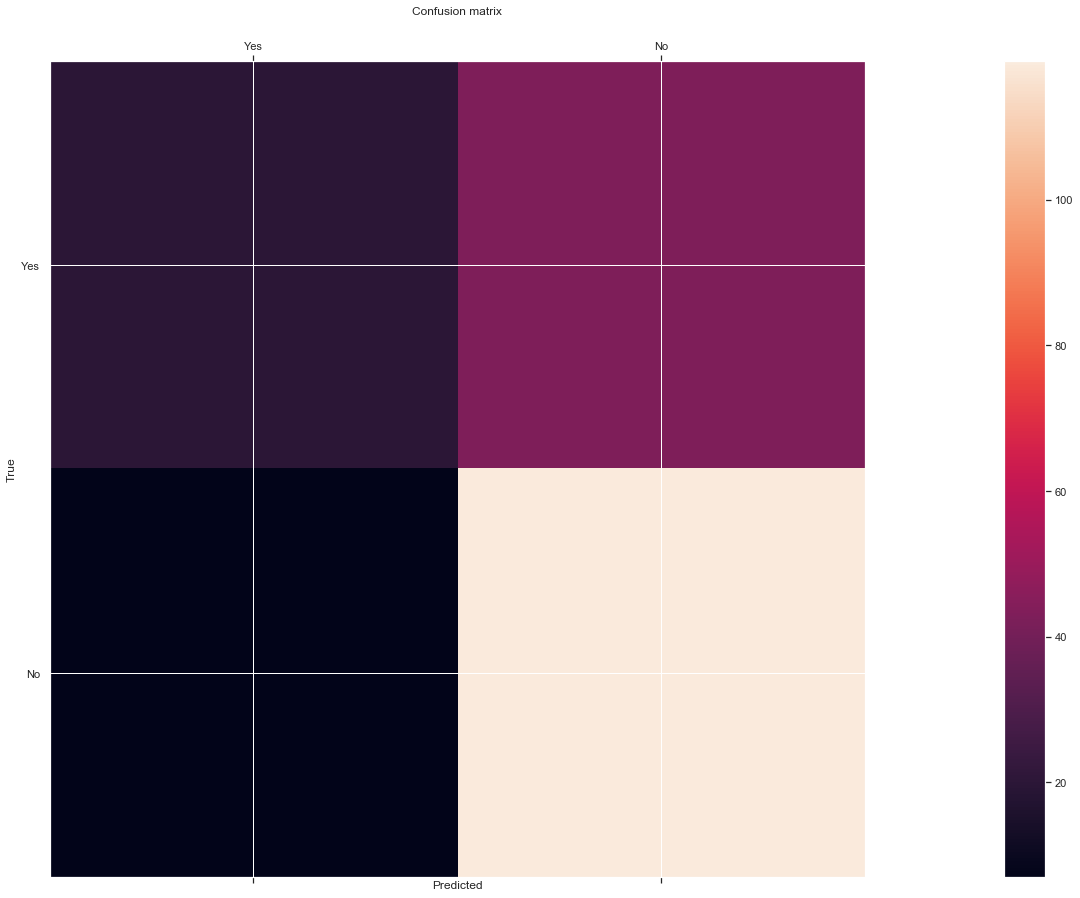

In [58]:
fig=plt.figure()
fig = plt.figure()
labels=['Yes','No']
ax = fig.add_subplot(111)
cax = ax.matshow(confusion)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels(['Yes'] + labels)
ax.set_yticklabels(['No'] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [59]:
TP = confusion [1,1]
TN = confusion [0,0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [60]:
Accuracy=((TP + TN) / float(TP + TN + FP + FN))
print(Accuracy)

0.7354497354497355


# Recall

In [61]:
print(TP/float(TP + FN))

0.9444444444444444


# Specificity

In [62]:
print (TN/float(FP+TN))

0.31746031746031744


# False Positive Rate

In [63]:
print(FP/float(TN + FP))

0.6825396825396826


# Precision

In [64]:
print(TP/float (TP+FP))

0.7345679012345679


In [65]:
predicted_y_prob= classifier.predict_proba(X_test) [:, 1]

Text(0, 0.5, 'Frequency')

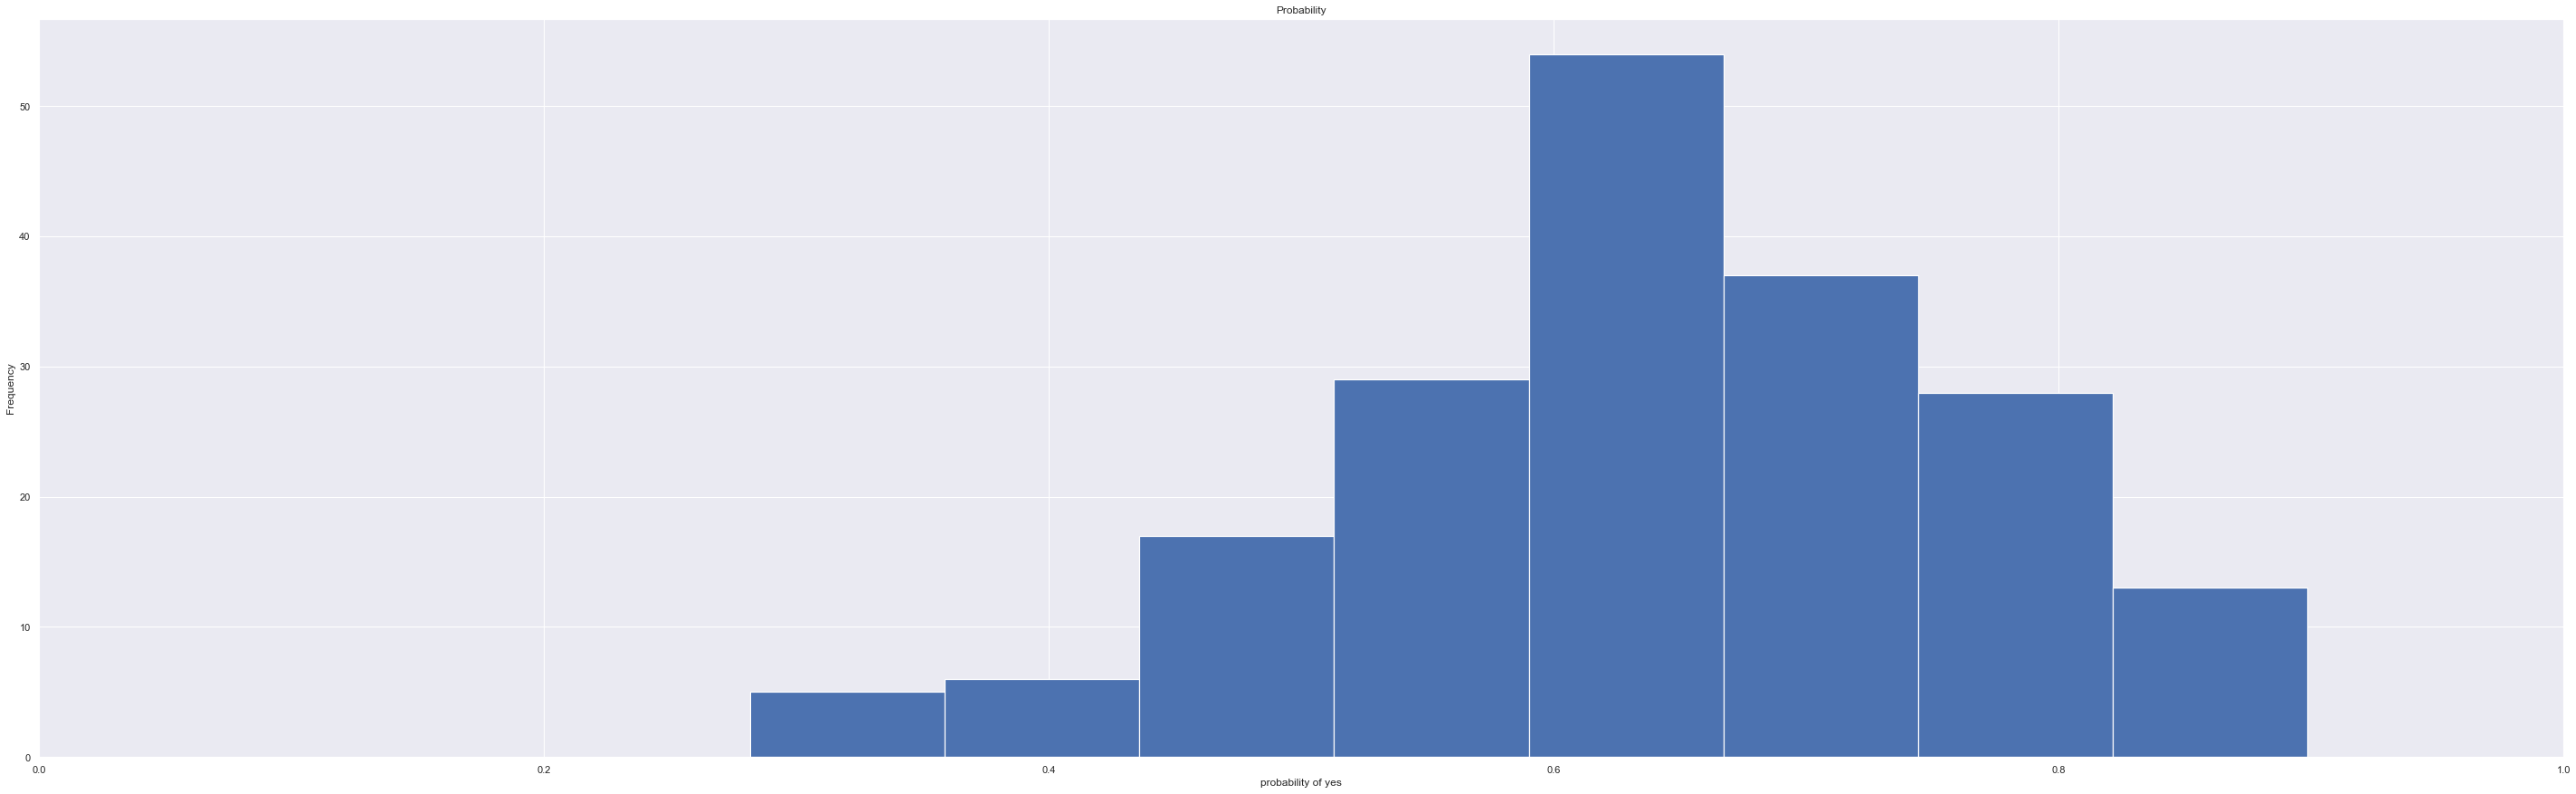

In [66]:
plt.hist(predicted_y_prob, bins=8, linewidth=1.2)
plt.xlim(0, 1)
plt.title("Probability")
plt.xlabel("probability of yes")
plt.ylabel("Frequency")

In [67]:
from sklearn.preprocessing import binarize
predicted_y_class = binarize([predicted_y_prob], 0.3)[0]

In [68]:
New_confusion= confusion_matrix(Y_test,predicted_y_class)
print(New_confusion)

[[  1  62]
 [  1 125]]


# New Confusion Matrix

Text(0.5, 954.4, 'Predicted label')

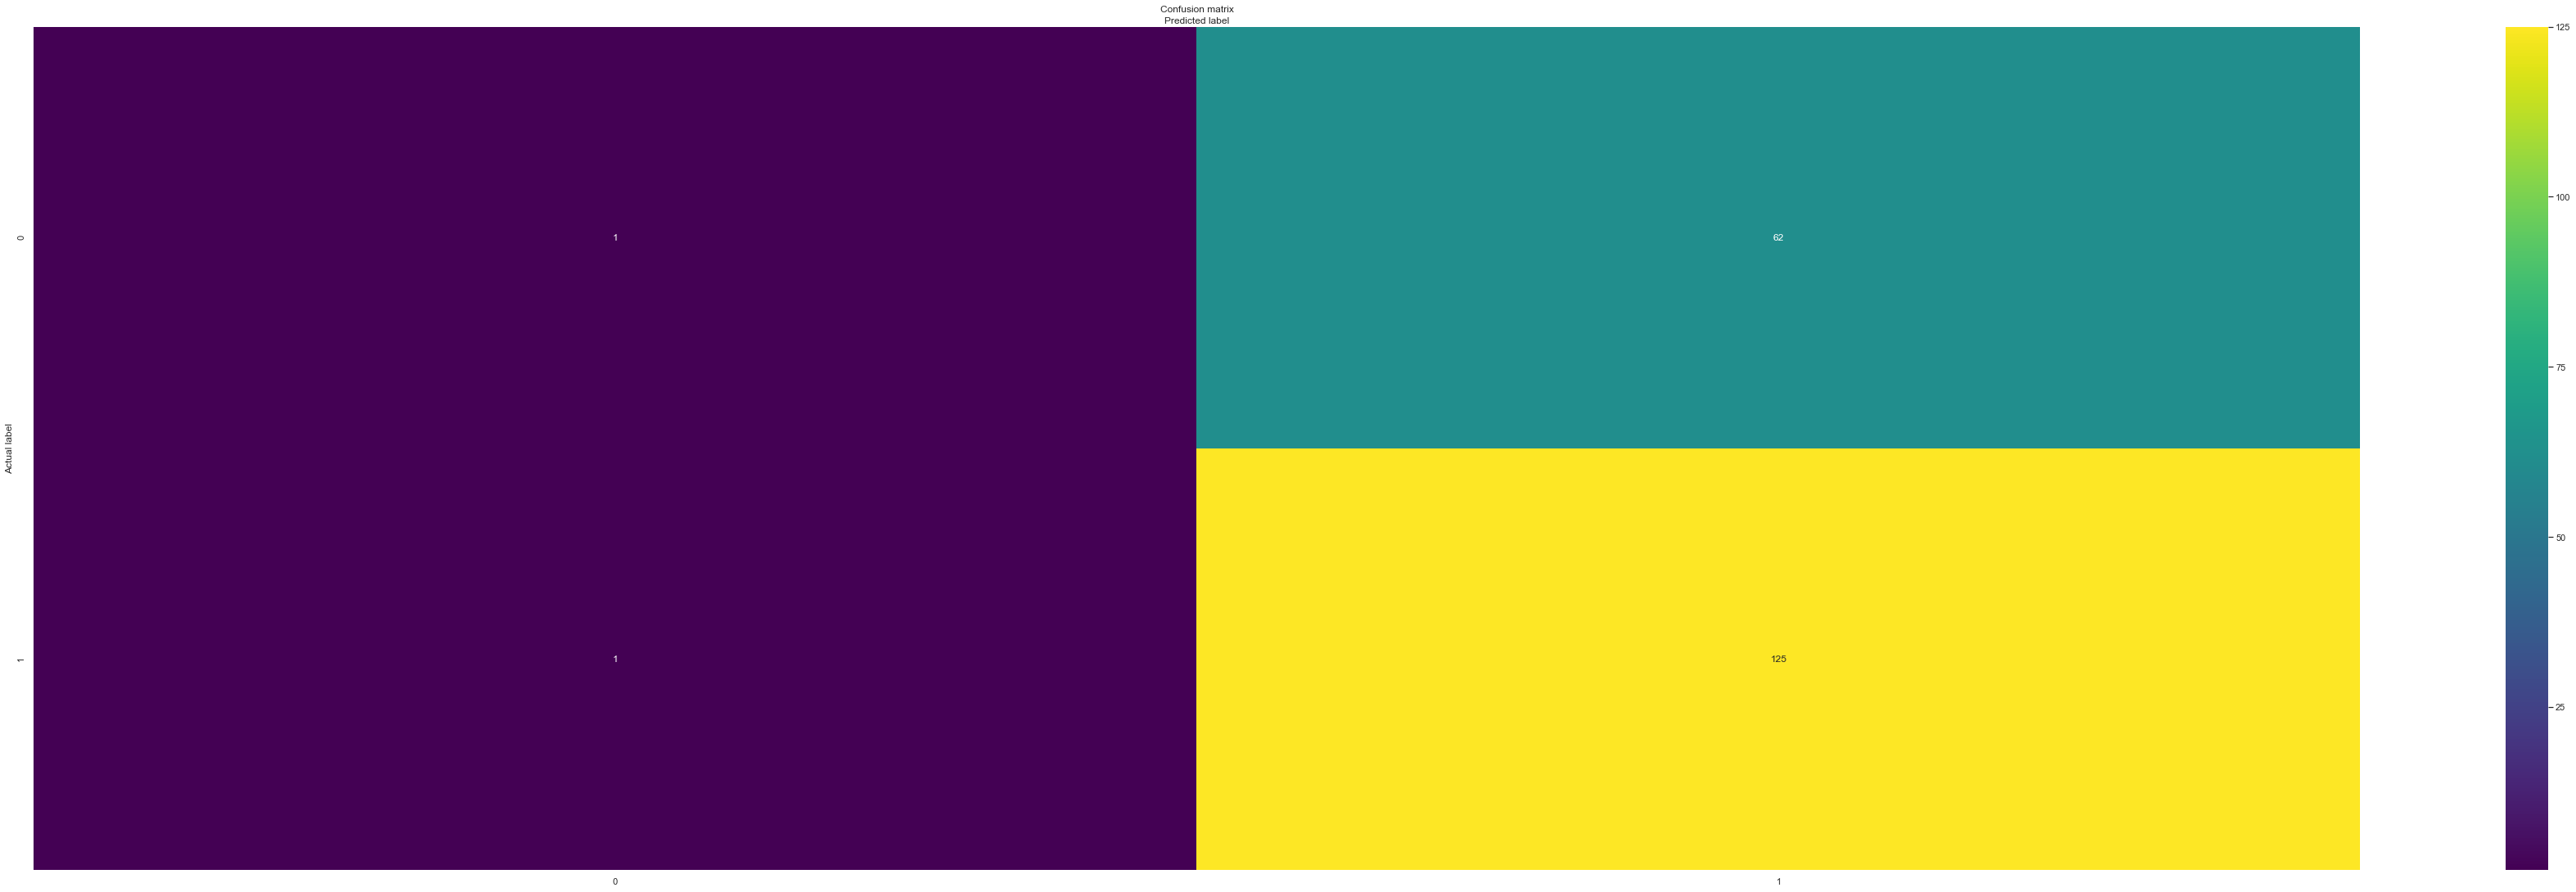

In [69]:
fig, ax = plt.subplots()
tick_marks = np.arange(len(df2))
plt.xticks(tick_marks, df2)
plt.yticks(tick_marks, df2)
sns.heatmap(pd.DataFrame(New_confusion), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [70]:
TP = New_confusion[1, 1]
TN = New_confusion[0, 0]
FP = New_confusion[0, 1]
FN = New_confusion[1, 0]

In [71]:
#Re-call
print(TP/ float(TP+FN))

0.9920634920634921


In [72]:
#specivity
print (TN/float(FP+TN))

0.015873015873015872


# ROC Curve

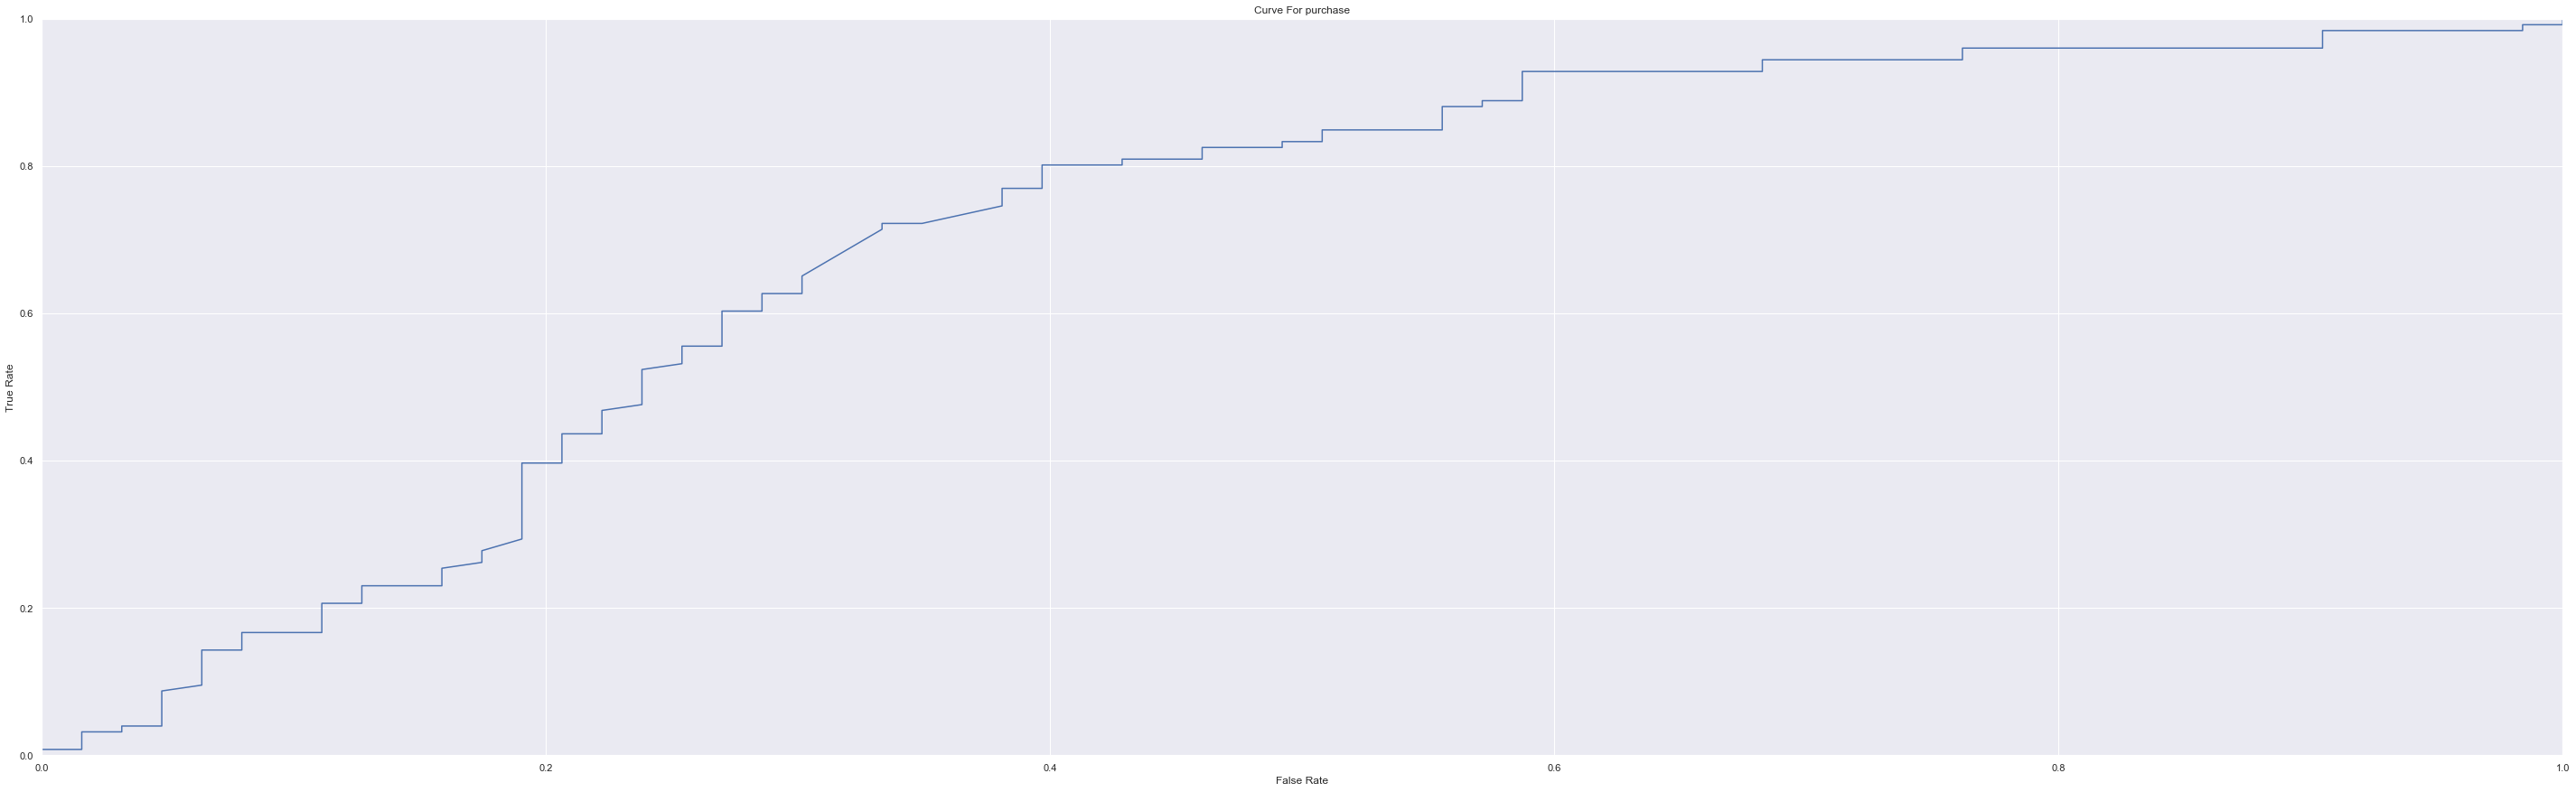

In [73]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test,predicted_y_prob)
plt.plot(fpr, tpr)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title ('Curve For purchase')
plt.xlabel("False Rate")
plt.ylabel("True Rate")
plt.show()



In [74]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, predicted_y_prob)

In [75]:
print(auc)

0.7091206853111615


# Auc Curve given Upper 
   It shows around 70% its called perfect classifier. so we can not do further tuning eith data.

In [76]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [77]:
evaluate_threshold(0.3)

Sensitivity: 0.9920634920634921
Specificity: 0.015873015873015928


In [78]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(Y_test, predicted_y_prob))

0.7091206853111615


In [79]:
evaluate_threshold(0.5)

Sensitivity: 0.9444444444444444
Specificity: 0.31746031746031744


In [80]:
from sklearn.model_selection import cross_val_score
cross_val_score(classifier, X_train, Y_train, cv=10, scoring='roc_auc').mean()

C:\Users\ronak\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ronak\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ronak\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ronak\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ronak\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

0.7154600823922153